In [234]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 125,'display.max_rows',130)

In [235]:
# Loading data

df_1 = pd.read_csv('application_data.csv')

In [236]:
df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [237]:
# Checking the info of the table to know the number of rows and columns

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [238]:
# Check the null values percentage in each columns

(df_1.isnull().sum()/307511 * 100).sort_values()

SK_ID_CURR                       0.000000
HOUR_APPR_PROCESS_START          0.000000
REG_REGION_NOT_WORK_REGION       0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_CITY_NOT_LIVE_CITY           0.000000
REG_CITY_NOT_WORK_CITY           0.000000
LIVE_CITY_NOT_WORK_CITY          0.000000
ORGANIZATION_TYPE                0.000000
FLAG_DOCUMENT_21                 0.000000
FLAG_DOCUMENT_20                 0.000000
FLAG_DOCUMENT_19                 0.000000
FLAG_DOCUMENT_18                 0.000000
FLAG_DOCUMENT_17                 0.000000
FLAG_DOCUMENT_16                 0.000000
FLAG_DOCUMENT_15                 0.000000
FLAG_DOCUMENT_14                 0.000000
FLAG_DOCUMENT_13                 0.000000
FLAG_DOCUMENT_12                 0.000000
FLAG_DOCUMENT_11                 0.000000
FLAG_DOCUMENT_10                 0.000000
FLAG_DOCUMENT_9                  0.000000
FLAG_DOCUMENT_8                  0.000000
FLAG_DOCUMENT_7                  0.000000
FLAG_DOCUMENT_6                  0

In [239]:
(df_1.isnull().sum()/3075.11 > 40).sum()

49

#### There are 49 columns which have more than 40% of null values. As I dont see any importance with these columns I am going to drop these columns

In [241]:
# Assigning column names to a variable(series) which will make dropping easier

drop_col = df_1.loc[:,df_1.isnull().sum()/3075.11 > 40].columns
drop_col

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [242]:
#Dropping the columns

df_1.drop(drop_col, axis = 1, inplace = True)

In [243]:
# Checking the info after dropping the columns

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [244]:
# Adding all the AMT_REQ_CREDIT_BUREAU columns into one column, and deleting the other columns

df_1['AMT_REQ_CREDIT_BUREAU'] = df_1.AMT_REQ_CREDIT_BUREAU_DAY + df_1.AMT_REQ_CREDIT_BUREAU_HOUR + df_1.AMT_REQ_CREDIT_BUREAU_MON + df_1.AMT_REQ_CREDIT_BUREAU_QRT + df_1.AMT_REQ_CREDIT_BUREAU_WEEK + df_1.AMT_REQ_CREDIT_BUREAU_YEAR
df_1.AMT_REQ_CREDIT_BUREAU.value_counts()

1.0      53914
2.0      51559
0.0      50911
3.0      39380
4.0      27241
5.0      17248
6.0      10775
7.0       6428
8.0       3834
9.0       2273
10.0      1055
11.0       511
12.0       279
13.0       163
14.0       138
15.0        85
16.0        60
17.0        42
18.0        32
19.0        22
20.0        19
21.0         9
22.0         4
23.0         3
30.0         2
28.0         1
27.0         1
262.0        1
31.0         1
24.0         1
Name: AMT_REQ_CREDIT_BUREAU, dtype: int64

In [245]:
# Removing the Outlier

df_1 = df_1[df_1.AMT_REQ_CREDIT_BUREAU != 262]

In [246]:
# deleting the other coumns

df_1.drop(['AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_YEAR'], axis = 1, inplace=True)

In [247]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307510 entries, 0 to 307510
Data columns (total 68 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307510 non-null  int64  
 1   TARGET                       307510 non-null  int64  
 2   NAME_CONTRACT_TYPE           307510 non-null  object 
 3   CODE_GENDER                  307510 non-null  object 
 4   FLAG_OWN_CAR                 307510 non-null  object 
 5   FLAG_OWN_REALTY              307510 non-null  object 
 6   CNT_CHILDREN                 307510 non-null  int64  
 7   AMT_INCOME_TOTAL             307510 non-null  float64
 8   AMT_CREDIT                   307510 non-null  float64
 9   AMT_ANNUITY                  307498 non-null  float64
 10  AMT_GOODS_PRICE              307232 non-null  float64
 11  NAME_TYPE_SUITE              306218 non-null  object 
 12  NAME_INCOME_TYPE             307510 non-null  object 
 13 

In [248]:
df_1.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   
8      100011       0         Cash loans           F            N   
9      100012       0    Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   
8               Y             0          112500.0   1019610.0      33826.5   
9               Y             0          135000.0    405000.0      20250.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   
8         913500.0         Children             Pensioner   
9         405000.0    Unaccompanied               Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   
8  Secondary / secondary special               Married  House / apartment   
9  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   
8                    0.018634      -20099         365243            -7427.0   
9                    0.019689      -14469          -2019           -14437.

In [249]:
df_1.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'], axis=1, inplace=True)

In [250]:
df_1['DAYS_BIRTH'].sort_values()

265026   -25229
63316    -25201
124430   -25201
143266   -25200
169562   -25197
          ...  
220805    -7678
53702     -7676
170384    -7676
168135    -7673
235444    -7489
Name: DAYS_BIRTH, Length: 307510, dtype: int64

In [251]:
# Converting the age to positive values and to years from days

df_1.DAYS_BIRTH = df_1.DAYS_BIRTH.apply(lambda x: abs(x//365))
df_1.DAYS_BIRTH

0         26
1         46
2         53
3         53
4         55
          ..
307506    26
307507    57
307508    42
307509    33
307510    47
Name: DAYS_BIRTH, Length: 307510, dtype: int64

In [252]:
# Converting Days_employed to positive values

df_1.DAYS_EMPLOYED = abs(df_1.DAYS_EMPLOYED)

In [253]:
df_1.DAYS_EMPLOYED.value_counts().sort_index()

0             2
1             1
2             2
3             3
4             4
          ...  
17531         1
17546         1
17583         1
17912         1
365243    55374
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [254]:
df_1.DAYS_ID_PUBLISH.value_counts().sort_index()

-7197     1
-6551     1
-6383     1
-6337     1
-6274     1
         ..
-4       57
-3       51
-2       50
-1       64
 0       16
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [255]:
# Converting them to positive values

df_1.DAYS_ID_PUBLISH = abs(df_1.DAYS_ID_PUBLISH)

In [256]:
df_1.DAYS_ID_PUBLISH.value_counts().sort_index()

0       16
1       64
2       50
3       51
4       57
        ..
6274     1
6337     1
6383     1
6551     1
7197     1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64

In [257]:
df_1.DAYS_LAST_PHONE_CHANGE.value_counts().sort_index()

-4292.0        1
-4185.0        1
-4173.0        1
-4153.0        1
-4131.0        1
           ...  
-4.0        1285
-3.0        1763
-2.0        2318
-1.0        2812
 0.0       37672
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [258]:
# Changing them to positive values

df_1.DAYS_LAST_PHONE_CHANGE = abs(df_1.DAYS_LAST_PHONE_CHANGE)

In [259]:
df_1.DAYS_LAST_PHONE_CHANGE.value_counts().sort_index()

0.0       37672
1.0        2812
2.0        2318
3.0        1763
4.0        1285
          ...  
4131.0        1
4153.0        1
4173.0        1
4185.0        1
4292.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

## Univariate Analysis on Non-Categorical columns

In [260]:
df_1.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307510.000000  307510.000000  307510.000000      3.075100e+05   
mean   278180.196176       0.080729       0.417050      1.687973e+05   
std    102790.187003       0.272419       0.722122      2.371233e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.250000       0.000000       0.000000      1.125000e+05   
50%    278201.500000       0.000000       0.000000      1.471500e+05   
75%    367141.750000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075100e+05  307498.000000     3.072320e+05   
mean   5.990246e+05   27108.563228     5.383946e+05   
std    4.024907e+05   14493.759672     3.694460e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307510.000000  307510.000000  307510.000000   
mean                     0.020868      44.433111   67724.951537   
std                      0.013831      11.954506  139443.930194   
min                      0.000290      21.000000       0.000000   
25%                      0.010006      35.000000     933.000000   
50%                      0.018850      44.000000    2219.000000   
75%                      0.028663      54.000000    5707.000000   
max                      0.072508      70.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  FLAG_EMP_PHONE  \
count      307510.000000    307510.000000  307510.000000   307510.000000   
mean        -4986.124741      2994.201486       0.999997        0.819889   
std          3522.891199      1509.452793       0.001803        0.384281   
min        -24672.000000         0.000000       0.000000        0.000000   
25%         -7479.750000      1720.000000       1.000000        1.000000   
50%         -4504.000000      3254.000000       1.000000        1.000000   
75%         -2010.000000      4299.000000       1.000000        1.000000   
max             0.000000      7197.000000       1.000000        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    307510.000000     307510.000000  307510.000000  307510.000000   
mean          0.199369          0.998133       0.281064       0.056720   
std           0.399527          0.043164       0.449519       0.231307   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307508.000000         307510.000000                307510.000000   
mean          2.152663              2.052463                     2.031521   
std           0.910682              0.509035                     0.502738   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
count               307510.000000               307510.000000   
mean                     0.015144                    0.050769   
std                 

In [261]:
df_1.CNT_CHILDREN.value_counts(normalize=True)*100

0     70.037072
1     19.875126
2      8.698579
3      1.208741
4      0.139508
5      0.027316
6      0.006829
7      0.002276
14     0.000976
19     0.000650
12     0.000650
10     0.000650
9      0.000650
8      0.000650
11     0.000325
Name: CNT_CHILDREN, dtype: float64

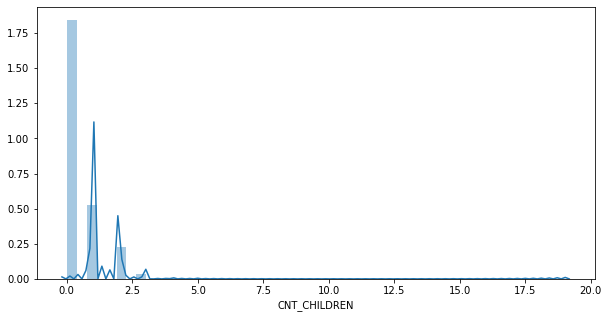

In [262]:
plt.figure(figsize=(10,5))
sns.distplot(df_1.CNT_CHILDREN)
plt.show()

In [263]:
df_1.AMT_INCOME_TOTAL.value_counts().sort_index()

25650.0         2
26100.0         3
26460.0         1
26550.0         2
27000.0        66
               ..
6750000.0       1
9000000.0       1
13500000.0      1
18000090.0      1
117000000.0     1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

In [264]:
# Converting the Income to Income in thousands

df_1['AMT_INCOME_TOTAL'] = df_1['AMT_INCOME_TOTAL']/1000

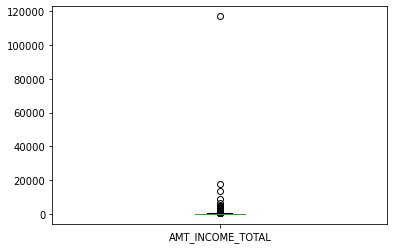

In [265]:
# Boxplot for Total income

df_1.AMT_INCOME_TOTAL.plot.box()
plt.show()

**We can clearly see one outlier here. I will find the highest value and remove the outlier.**

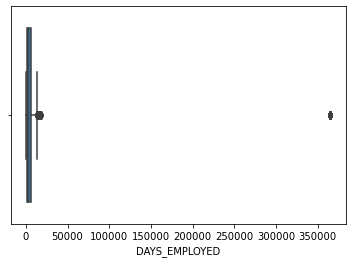

In [266]:
sns.boxplot(df_1.DAYS_EMPLOYED)

**Seems to have outliers**

In [267]:
df_1[df_1.DAYS_EMPLOYED > 350000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
8           100011       0         Cash loans           F            N   
11          100015       0         Cash loans           F            N   
23          100027       0         Cash loans           F            N   
38          100045       0         Cash loans           F            N   
43          100050       0         Cash loans           F            N   
...            ...     ...                ...         ...          ...   
307469      456209       0         Cash loans           F            N   
307483      456227       0         Cash loans           F            N   
307487      456231       0         Cash loans           M            N   
307505      456249       0         Cash loans           F            N   
307507      456252       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
8                    Y             0        112.500000   1019610.0   
11                   Y             0         38.419155    148365.0   
23                   Y             0         83.250000    239850.0   
38                   Y             0         99.000000    247275.0   
43                   Y             0        108.000000    746280.0   
...                ...           ...               ...         ...   
307469               Y             0        202.500000    703728.0   
307483               Y             0         99.000000    247275.0   
307487               Y             0        117.000000   1071909.0   
307505               Y             0        112.500000    225000.0   
307507               Y             0         72.000000    269550.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
8           33826.5         913500.0        Children        Pensioner   
11          10678.5         135000.0        Children        Pensioner   
23          23850.0         225000.0   Unaccompanied        Pensioner   
38          17338.5         225000.0   Unaccompanied        Pensioner   
43          42970.5         675000.0   Unaccompanied        Pensioner   
...             ...              ...             ...              ...   
307469      29943.0         607500.0   Unaccompanied        Pensioner   
307483      16479.0         225000.0   Unaccompanied        Pensioner   
307487      31473.0         936000.0   Unaccompanied        Pensioner   
307505      22050.0         225000.0   Unaccompanied        Pensioner   
307507      12001.5         225000.0   Unaccompanied        Pensioner   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
8       Secondary / secondary special               Married   
11      Secondary / secondary special               Married   
23      Secondary / secondary special               Married   
38      Secondary / secondary special               Married   
43                   Higher education  Single / not married   
...                               ...                   ...   
307469  Secondary / secondary special  Single / not married   
307483  Secondary / secondary special             Separated   
307487  Secondary / secondary special               Married   
307505  Secondary / secondary special  Single / not married   
307507  Secondary / secondary special                 Widow   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
8       House / apartment                    0.018634          56   
11      House / apartment                    0.015221          56   
23      House / apartment                    0.006296          69   
38      House / apartment                    0.006207          66   
43      House / apartment                    0.010966          65   
...                   ...                         ...         ...   
307469  House / apartment                    0.031329          62   
307483  House / apartment                    0.007330          69   
307487  House / apartme

**There are more than 55000 outliers, and they are all same values which is 365243 which seems to be some kind of code. I am not dealing with these outliers**

In [268]:
# Finding and removing the outlier

df_1.AMT_INCOME_TOTAL.describe()

count    307510.000000
mean        168.797298
std         237.123281
min          25.650000
25%         112.500000
50%         147.150000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [269]:
# df_1 = df_1[df_1.AMT_INCOME_TOTAL_in_Thousands != 117000]
df_1 = df_1[df_1.AMT_INCOME_TOTAL != 117000]


In [270]:
df_1['AMT_INCOME_TOTAL']

0         202.5
1         270.0
2          67.5
3         135.0
4         121.5
          ...  
307506    157.5
307507     72.0
307508    153.0
307509    171.0
307510    157.5
Name: AMT_INCOME_TOTAL, Length: 307509, dtype: float64

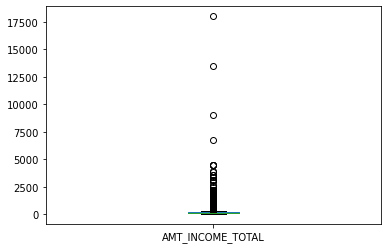

In [271]:
df_1.AMT_INCOME_TOTAL.plot.box()
plt.show()

***We Can still see the values above 5000 are still not closely packed and look like outliers. I can remove all the rows greater than 5000***

In [272]:
# checking the values greater than 5000

df_1[df_1.AMT_INCOME_TOTAL > 4000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
77768       190160       0         Cash loans           F            Y   
103006      219563       0    Revolving loans           M            Y   
131127      252084       0         Cash loans           M            Y   
187833      317748       0         Cash loans           M            N   
203693      336147       0         Cash loans           M            Y   
204564      337151       0         Cash loans           M            N   
246858      385674       0         Cash loans           M            Y   
287463      432980       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
77768                N             0           9000.00   1431531.0   
103006               Y             0           4500.00   2250000.0   
131127               N             0           6750.00    790830.0   
187833               N             0           4500.00    835380.0   
203693               Y             2          18000.09    675000.0   
204564               N             0           4500.00    450000.0   
246858               Y             0          13500.00   1400503.5   
287463               Y             0           4500.00   1755000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
77768      132601.5        1377000.0   Unaccompanied               Working   
103006     225000.0        2250000.0   Unaccompanied               Working   
131127      52978.5         675000.0   Unaccompanied               Working   
187833      42651.0         675000.0   Unaccompanied               Working   
203693      69295.5         675000.0   Unaccompanied  Commercial associate   
204564      47749.5         450000.0   Unaccompanied               Working   
246858     130945.5        1368000.0   Unaccompanied  Commercial associate   
287463      61132.5        1755000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
77768                Higher education        Civil marriage   
103006               Higher education  Single / not married   
131127               Higher education               Married   
187833  Secondary / secondary special               Married   
203693  Secondary / secondary special               Married   
204564               Higher education  Single / not married   
246858               Higher education               Married   
287463               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
77768   House / apartment                    0.010147          45   
103006  House / apartment                    0.007330          30   
131127  House / apartment                    0.009549          53   
187833  House / apartment                    0.006008          52   
203693  House / apartment                    0.030755          44   
204564  House / apartment                    0.009334          51   
246858  House / apartment                    0.030755          38   
287463  House / apartment                    0.010032          52   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
77768            8476            -7276.0             1656           1   
103006            378            -4919.0             3441           1   
131127            443            -7414.0             2886           1   
187833           3331            -8877.0             2104           1   
203693           4961            -3338.0             4728           1   
204564           8472            -1179.0             1997           1   
246858            280            -3953.0             4972           1   
287463           3618            -9447.0             2315           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
77768                1                0                 1           0   
103006       

***There are only four rows greater than 5000. We can remove them***

In [273]:
# Deleting the rows with income greater than 5000

df_1 = df_1[df_1.AMT_INCOME_TOTAL < 5000]

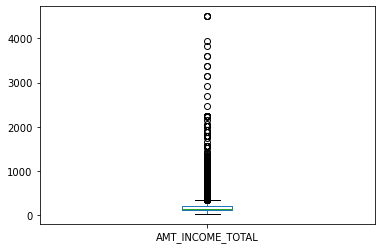

In [274]:
df_1.AMT_INCOME_TOTAL.plot.box()
plt.show()

***Now the dots are closely packed compared to the previous versions of boxplots. We can continue with this Data***

In [275]:
df_1.AMT_CREDIT = df_1.AMT_CREDIT/1000

In [276]:
df_1.AMT_CREDIT.describe()

count    307505.000000
mean        599.018516
std         402.488363
min          45.000000
25%         270.000000
50%         513.531000
75%         808.650000
max        4050.000000
Name: AMT_CREDIT, dtype: float64

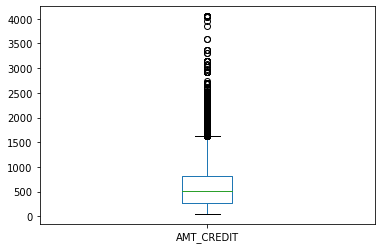

In [277]:
df_1.AMT_CREDIT.plot.box()
plt.show()

***Here we can see there are no distinct outliers which are far away from the dots below. We can continue with the data here***

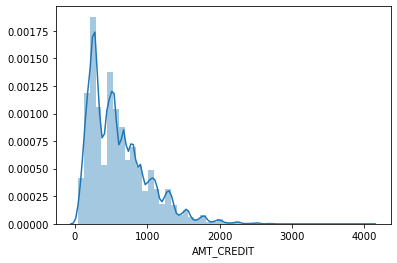

In [278]:
# Distribution of credit amounts

sns.distplot(df_1.AMT_CREDIT)
plt.show()

***We can see the credit amount of most of the customers is less than 1 million and some customers between 1 and 2 million***

### Annuity amount

In [279]:
df_1.AMT_ANNUITY.value_counts()

9000.0     6385
13500.0    5514
6750.0     2279
10125.0    2035
37800.0    1602
           ... 
82516.5       1
41778.0       1
41242.5       1
91674.0       1
42115.5       1
Name: AMT_ANNUITY, Length: 13670, dtype: int64

In [280]:
# converting the annuity amount to amount in thousand

df_1.AMT_ANNUITY = df_1.AMT_ANNUITY/1000

In [281]:
df_1.AMT_ANNUITY.describe()

count    307493.000000
mean         27.107664
std          14.491144
min           1.615500
25%          16.524000
50%          24.903000
75%          34.596000
max         258.025500
Name: AMT_ANNUITY, dtype: float64

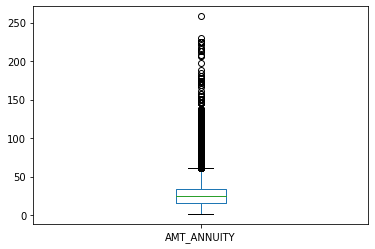

In [282]:
df_1.AMT_ANNUITY.plot.box()
plt.show()

In [283]:
# Removing the max value from, as it seems to be an outlier

df_1 = df_1[df_1.AMT_ANNUITY != 258.025500]

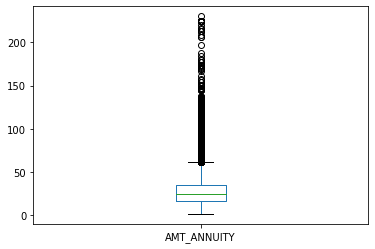

In [284]:
df_1.AMT_ANNUITY.plot.box()
plt.show()

In [285]:
amt_annuity = pd.to_numeric(df_1['AMT_ANNUITY'], errors='coerce')

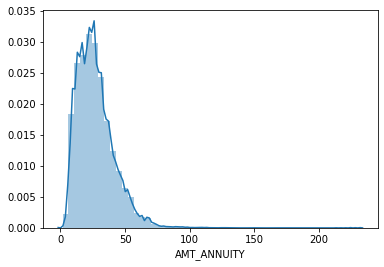

In [286]:

sns.distplot(amt_annuity.dropna())
plt.show()

**Annuity amount of most of the customers lies below 50,000.***

In [287]:
df_1.AMT_GOODS_PRICE.value_counts()

450000.0    26022
225000.0    25282
675000.0    24960
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [288]:
#Converting the AMT_GOODS_PRICE to AMT_GOODS_PRICE in thousands

df_1.AMT_GOODS_PRICE = df_1.AMT_GOODS_PRICE/1000

In [289]:
df_1.AMT_GOODS_PRICE.value_counts()

450.0000    26022
225.0000    25282
675.0000    24960
900.0000    15416
270.0000    11428
            ...  
388.6740        1
872.8920        1
443.4210        1
642.9150        1
387.4095        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

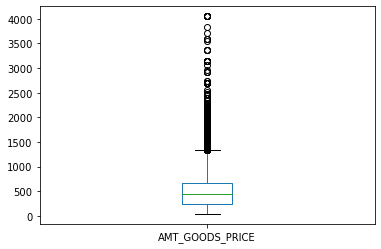

In [290]:
df_1.AMT_GOODS_PRICE.plot.box()
plt.show()

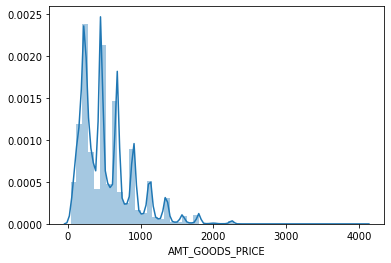

In [291]:
sns.distplot(df_1.AMT_GOODS_PRICE.dropna())
plt.show()

**Most of the customers have AMT_GOODS_PRICE below 1 million and a few between 1 and 2 million.**

### Client Age

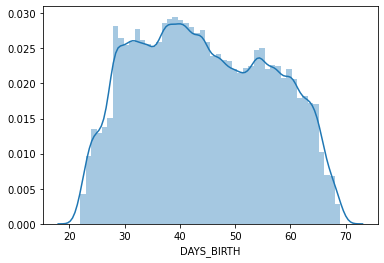

In [292]:
sns.distplot(df_1.DAYS_BIRTH)
plt.show()

**Age of the clients approximately follow a normal distribution as expected**

In [293]:
df_1.EXT_SOURCE_2.value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.047854      1
0.169134      1
0.213753      1
0.057994      1
0.336367      1
Name: EXT_SOURCE_2, Length: 119829, dtype: int64

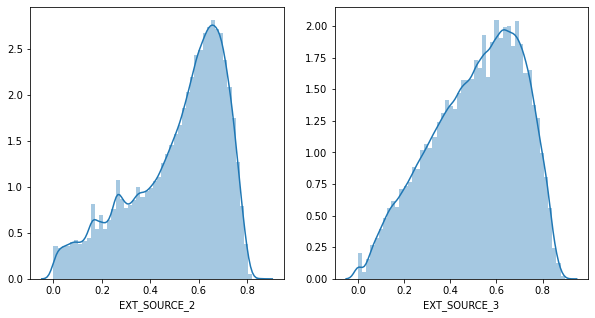

In [294]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df_1.EXT_SOURCE_2.dropna())
plt.subplot(1,2,2)
sns.distplot(df_1.EXT_SOURCE_3.dropna())
plt.show()

In [295]:
df_1[['EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

EXT_SOURCE_2  EXT_SOURCE_3
EXT_SOURCE_2      1.000000      0.109152
EXT_SOURCE_3      0.109152      1.000000

   ## Categorical Attributes

### Target

In [296]:
df_1.TARGET.describe()

count    307504.000000
mean          0.080727
std           0.272416
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64

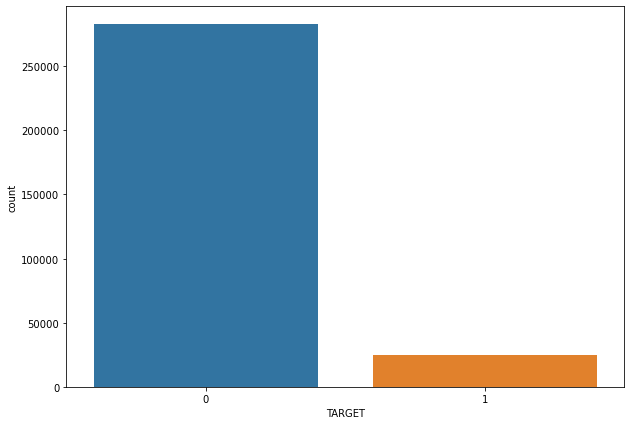

In [297]:
plt.figure(figsize=(10,7))
sns.countplot(df_1.TARGET)
plt.show()

**8% of the clients have had payment difficulties in the past**

In [298]:
df_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904785
Revolving loans    0.095215
Name: NAME_CONTRACT_TYPE, dtype: float64

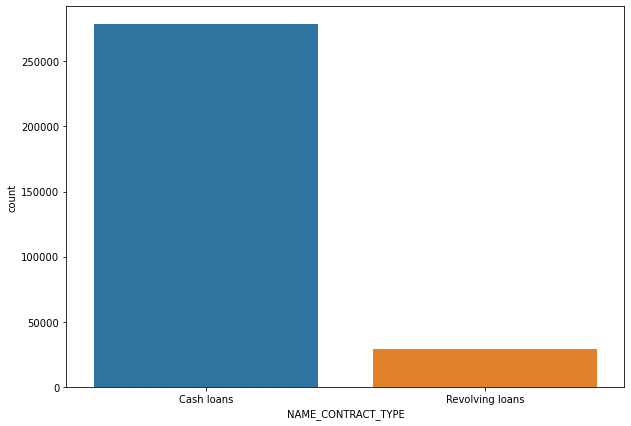

In [299]:
plt.figure(figsize=(10,7))
sns.countplot(df_1.NAME_CONTRACT_TYPE)
plt.show()

**90% of the clients have taken cash loans while the remaining 10% has taken revolving loans**

In [300]:
df_1.CODE_GENDER.value_counts(normalize=True)

F      0.658349
M      0.341638
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [301]:
df_1 = df_1[df_1.CODE_GENDER != 'XNA']

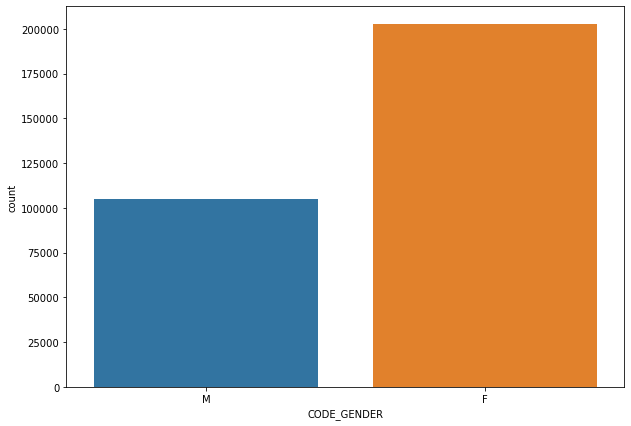

In [302]:
plt.figure(figsize=(10,7))
sns.countplot(df_1.CODE_GENDER)
plt.show()

**66% of the clients are female and 34% are male**

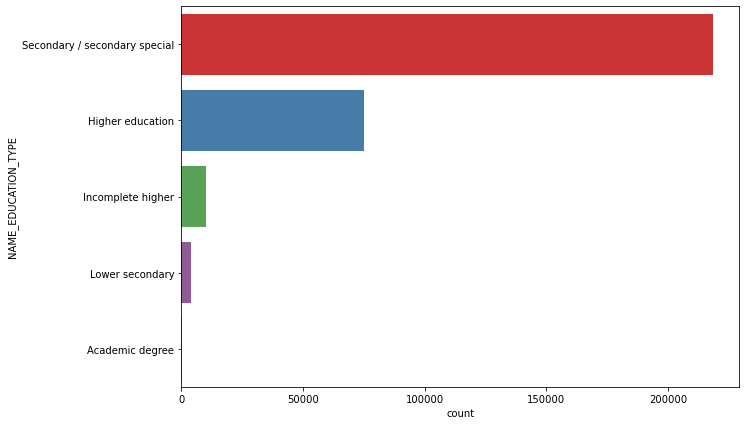

In [303]:
plt.figure(figsize=(10,7))
sns.countplot(y=df_1.NAME_EDUCATION_TYPE,palette='Set1')
plt.show()

**70% of the clients have completed secondary education and nearly 25% have done higher education**

# Bivariate Analysis

## Lets check the correlation between all the Numeric variable and that with Target

In [304]:
amt_corr = df_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']].corr()

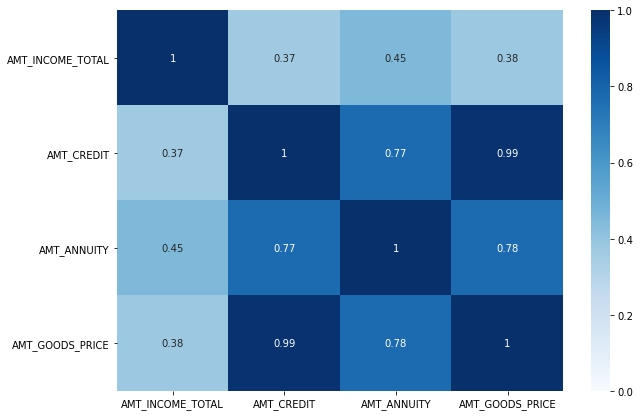

In [305]:
plt.figure(figsize=(10,7))
sns.heatmap(amt_corr, annot=True, cmap='Blues', vmin=0)
plt.show()

**All the amount variables are highly correlated to each other positively except the income of the clients, which is also positively correlated but with a relatively smaller coefficient.**

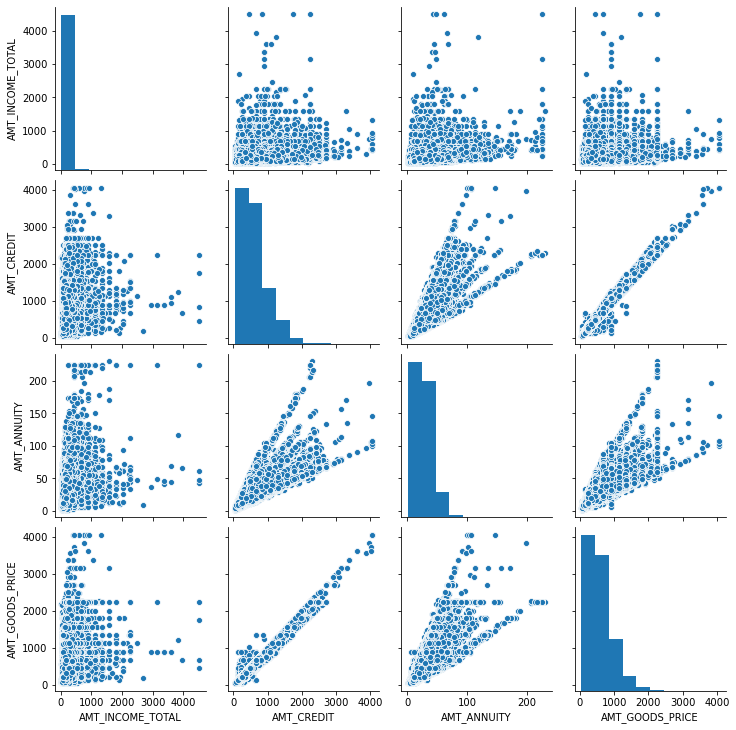

In [306]:
sns.pairplot(df_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

 - **WE can see a linear correlation among the three variables AMt_annuity, Amt_credit and Amt_goods_price. We can infer that greater the price of the goods, greater will be the Credit and annuity amount of the loan.**
 - **And if we see the AMT_income graphs we can observe most of the points are less than 2million and very less points beyond 2 million. This means we rarely have clients who earn more than 2 million**

In [307]:
# Spliting the table into 2 parts based on the Target variable

d1 = df_1[df_1.TARGET == 1]
d2 = df_1[df_1.TARGET == 0]

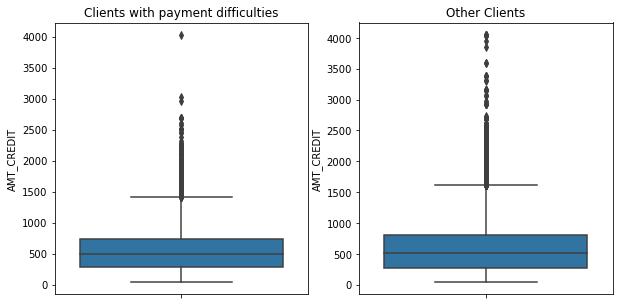

In [308]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.AMT_CREDIT)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y=d2.AMT_CREDIT)
plt.show()

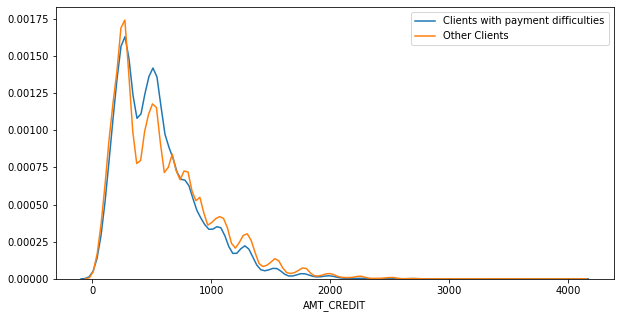

In [309]:
plt.figure(figsize=(10,5))
sns.distplot(d1.AMT_CREDIT, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.AMT_CREDIT, hist=False, label= 'Other Clients')
plt.show()

**There is no notable effect of the credit amount on the clients who had payment difficulty and the clients who are paying on time. Same will be the case with Loan goods price and the annuity amount, because they all are linearly related**

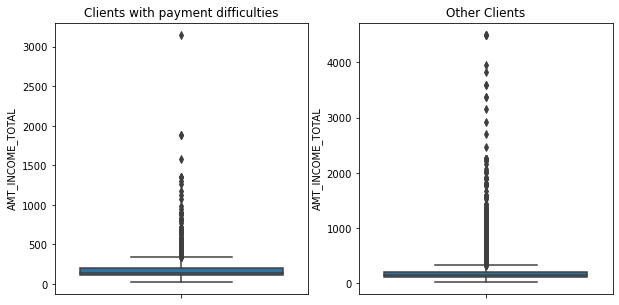

In [310]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.AMT_INCOME_TOTAL)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y=d2.AMT_INCOME_TOTAL)
plt.show()

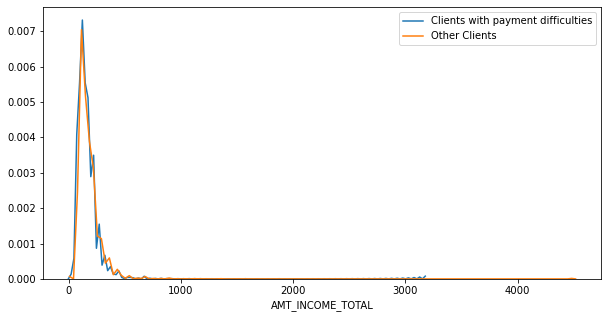

In [311]:
plt.figure(figsize=(10,5))
sns.distplot(d1.AMT_INCOME_TOTAL, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.AMT_INCOME_TOTAL, hist=False, label= 'Other Clients')
plt.show()

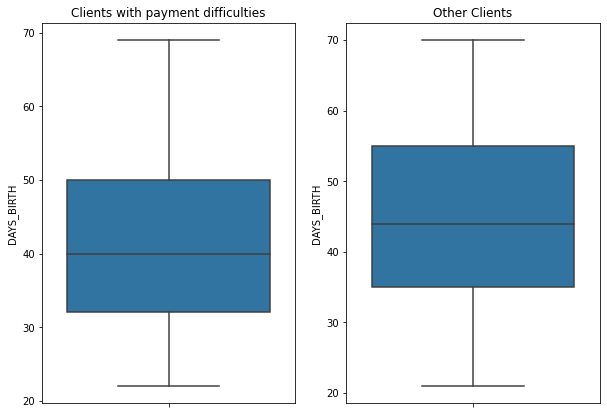

In [312]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.DAYS_BIRTH)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y=d2.DAYS_BIRTH)
plt.show()

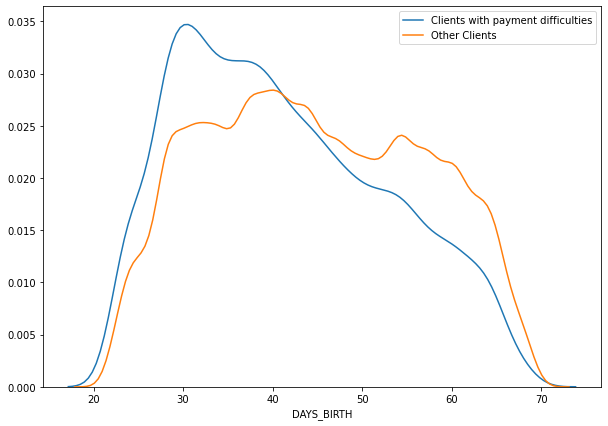

In [313]:
plt.figure(figsize=(10,7))
sns.distplot(d1.DAYS_BIRTH, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.DAYS_BIRTH, hist=False, label= 'Other Clients')
plt.show()

- **Mean age of the clients who had payment difficulties is lesser than the mean age of other clients**
- **We can see a trend from the above line plot. Below age 40, clients who have defaulted is more than the clients who have paid on time. And age above 40, clients who have defaulted is comparitively less.**

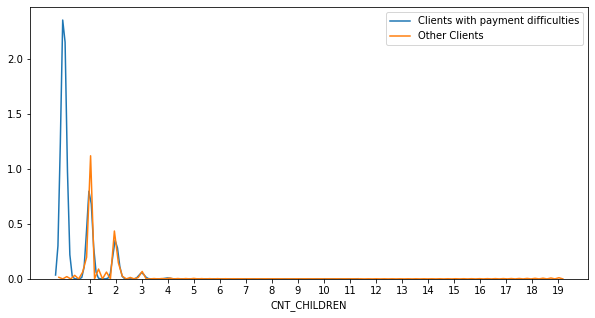

In [314]:
plt.figure(figsize=(10,5))
sns.distplot(d1.CNT_CHILDREN, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.CNT_CHILDREN, hist=False, label= 'Other Clients')
plt.xticks(ticks=list(range(1,20)))
plt.show()

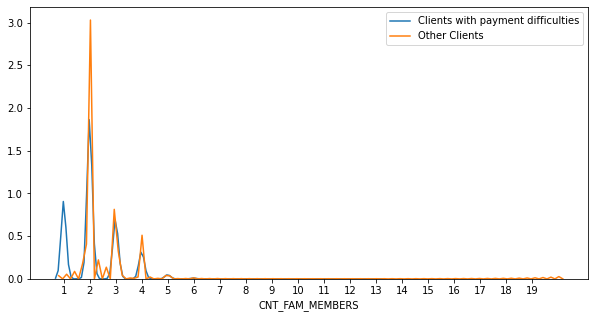

In [315]:
plt.figure(figsize=(10,5))
sns.distplot(d1.CNT_FAM_MEMBERS, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.CNT_FAM_MEMBERS, hist=False, label= 'Other Clients')
plt.xticks(ticks=list(range(1,20)))
plt.show()

**Considering the Clients with 1 or no family, a very high percentage of clients have defaulted the loan and the clients who have paid correctly is very low**

### Score from external source

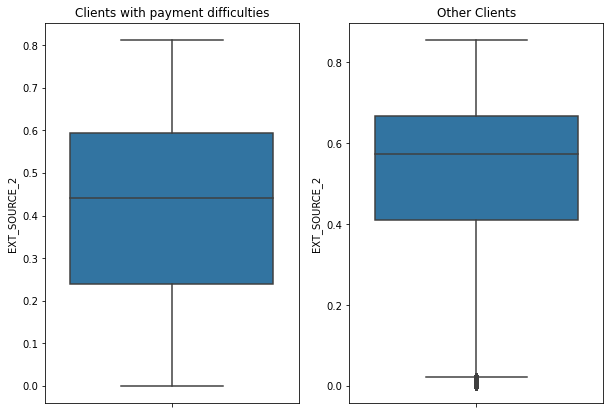

In [316]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.EXT_SOURCE_2)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y=d2.EXT_SOURCE_2)
plt.show()

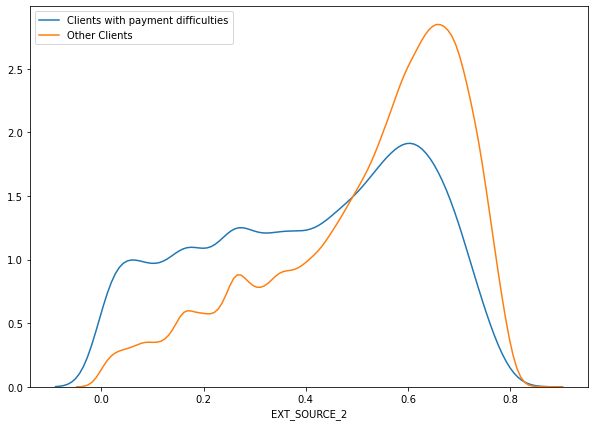

In [317]:
plt.figure(figsize=(10,7))
sns.distplot(d1.EXT_SOURCE_2, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.EXT_SOURCE_2, hist=False, label= 'Other Clients')
plt.show()

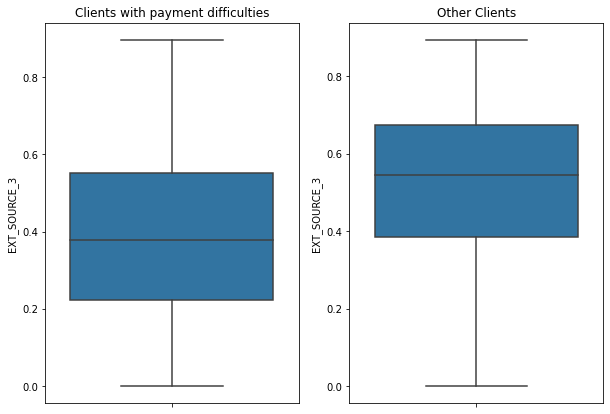

In [318]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.EXT_SOURCE_3)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y=d2.EXT_SOURCE_3)
plt.show()

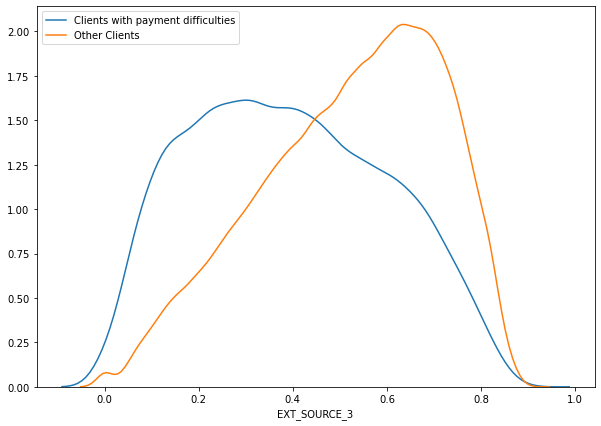

In [319]:
plt.figure(figsize=(10,7))
sns.distplot(d1.EXT_SOURCE_3, hist=False, label= 'Clients with payment difficulties')
sns.distplot(d2.EXT_SOURCE_3, hist=False, label= 'Other Clients')
plt.show()

**In both the cases**
 - **Clients with less scores(<0.5) are more tended to default the loan payment than paying.**
 - **Clients with better scores(>0.5) are more tended to pay the loans correctly than defaulting the payment**
 - **Mean score of the other clients is higher than the clients who had payment difficulties**

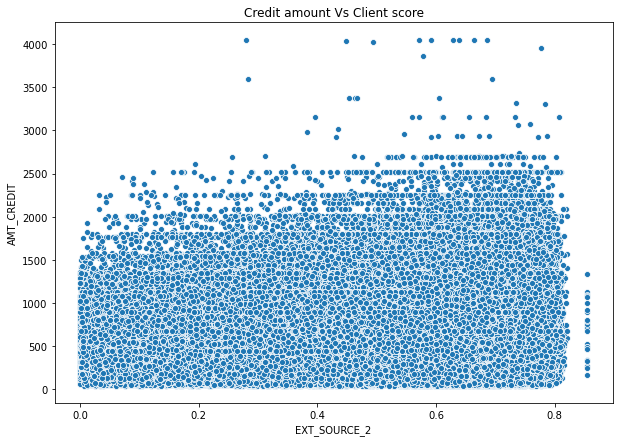

In [320]:
plt.figure(figsize=(10,7))
plt.title('Credit amount Vs Client score')
sns.scatterplot(df_1.EXT_SOURCE_2, df_1.AMT_CREDIT)
plt.show()

**Clients with higher Loan credit amount are having better score and are also tended to repay the loans correctly and on time.**

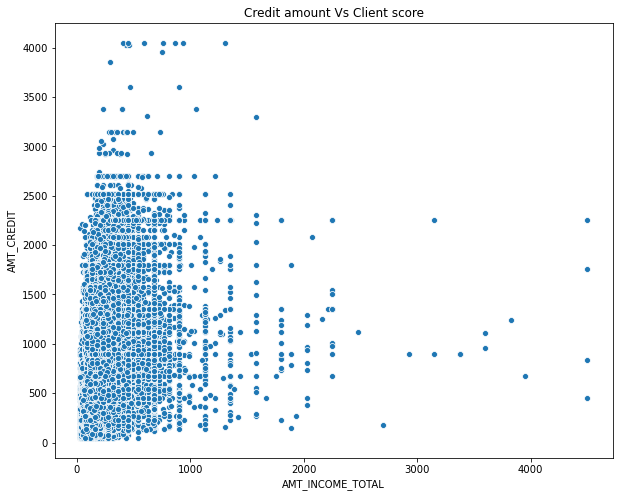

In [321]:
plt.figure(figsize=(10,8))
plt.title('Credit amount Vs Client score')
sns.scatterplot(df_1.AMT_INCOME_TOTAL, df_1.AMT_CREDIT)
plt.show()

**We can observe a very interesting trend here**
- Clients who have very high credit amount of more than 2.5 million are mostly under the 1 million income range and some under the 2million income range
- Clients with very high income of 2million and above have taken a loan of mostly less than 1.5 million

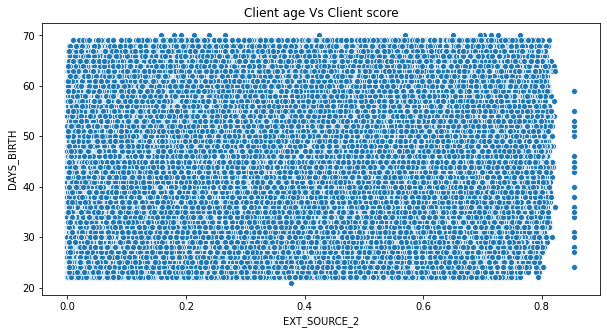

In [322]:
plt.figure(figsize=(10,5))
plt.title('Client age Vs Client score')
sns.scatterplot(df_1.EXT_SOURCE_2, df_1.DAYS_BIRTH)
plt.show()

**We cannot conclude anything here. Score is not dependant on age**

In [323]:
df_1.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     271315
1.0      28327
2.0       5323
3.0       1192
4.0        252
5.0         56
6.0         11
7.0          1
8.0          1
34.0         1
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

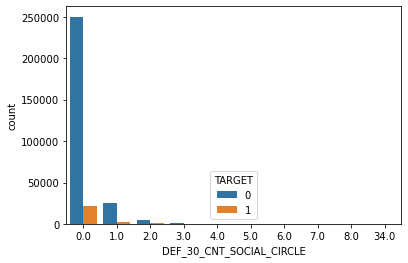

In [324]:
sns.countplot(x = 'DEF_30_CNT_SOCIAL_CIRCLE', hue='TARGET', data=df_1, orient='v')
plt.show()

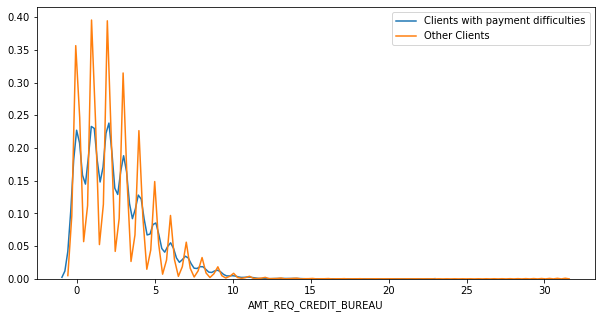

In [325]:
plt.figure(figsize=(10,5))
sns.distplot(d1.AMT_REQ_CREDIT_BUREAU, hist=False,label= 'Clients with payment difficulties')
sns.distplot(d2.AMT_REQ_CREDIT_BUREAU, hist=False, label= 'Other Clients')
plt.show()

**There is no trend to be observerd from the above graph**

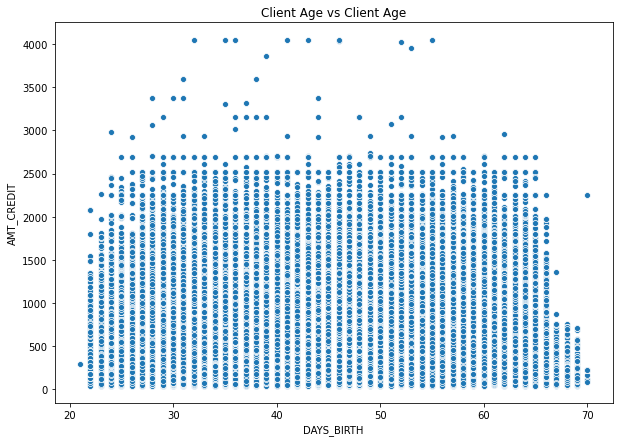

In [326]:
plt.figure(figsize=(10,7))
plt.title('Client Age vs Client Age')
sns.scatterplot(df_1.DAYS_BIRTH, df_1.AMT_CREDIT)
plt.show()

**There is no clear relation between the client age and the Loan credit amount**

**Clients older than 55 do not have high credit amount, that is more than 3 million**

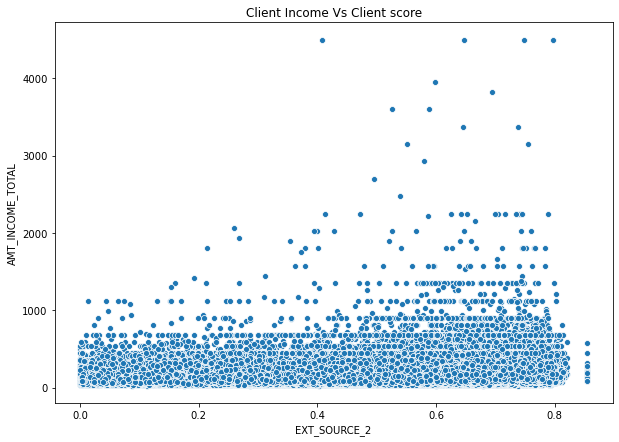

In [327]:
plt.figure(figsize=(10,7))
plt.title('Client Income Vs Client score')
sns.scatterplot(df_1.EXT_SOURCE_2, df_1.AMT_INCOME_TOTAL)
plt.show()

**This plot follows a positive correlation. Clients with higher income are having better score(>0.5)**

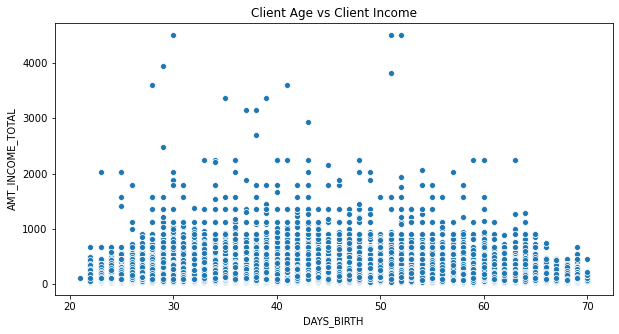

In [328]:
plt.figure(figsize=(10,5))
plt.title('Client Age vs Client Income')
sns.scatterplot(df_1.DAYS_BIRTH, df_1.AMT_INCOME_TOTAL)
plt.show()

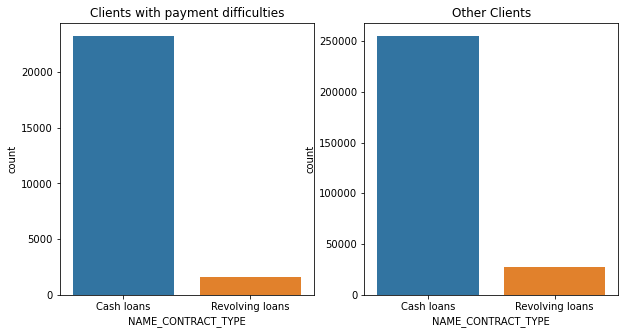

In [329]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(d1.NAME_CONTRACT_TYPE)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(d2.NAME_CONTRACT_TYPE)
plt.show()

**We already know 90% of the clients have taken cash loan.**
**There is no notable trend in the contract type affecting the loan payment**

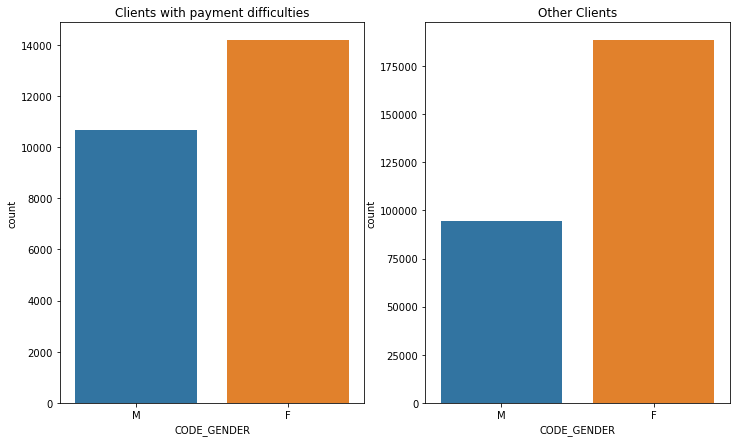

In [330]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(d1.CODE_GENDER, )
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(d2.CODE_GENDER, order=['M','F'])
plt.show()

 - **There is no difference in the female clients count in both the graphs. Proportionately same number of female clients in both the categories**
 - **We can see proportionately more number of male clients who defaulted than the other male clients**

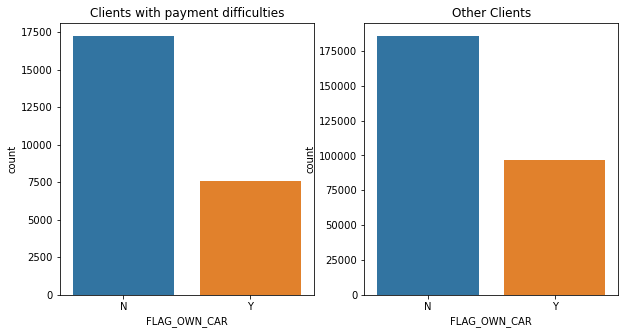

In [331]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(d1.FLAG_OWN_CAR)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(d2.FLAG_OWN_CAR)
plt.show()

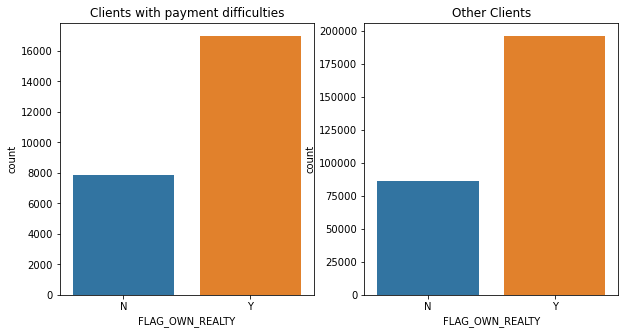

In [332]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(d1.FLAG_OWN_REALTY, order=['N','Y'])
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(d2.FLAG_OWN_REALTY)
plt.show()

**As expected, owning a car or house does not have any effect on payment difficulties**

## Target vs Income Type/Education type/Family Status/Housing Type/Occupation type of the clients

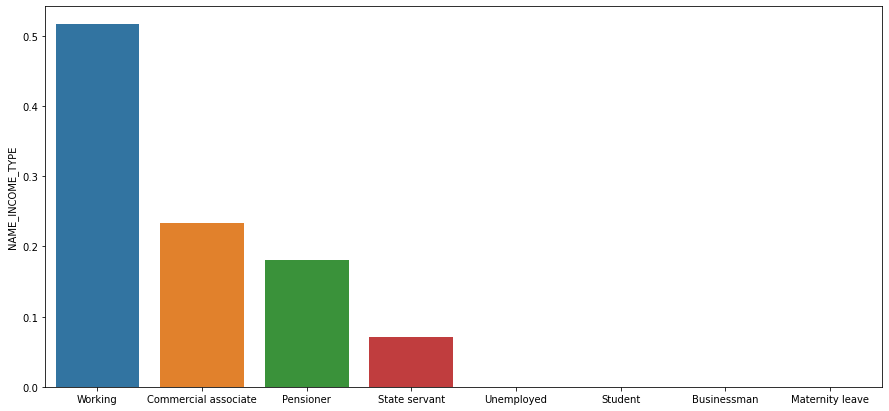

In [333]:
plt.figure(figsize=(15,7))
sns.barplot(x= df_1.NAME_INCOME_TYPE.value_counts(normalize=True).index, y=df_1.NAME_INCOME_TYPE.value_counts(normalize=True))
plt.show()

**Almost 50% of the clients are Working, while nearly 23% of the clients are commercial associates**

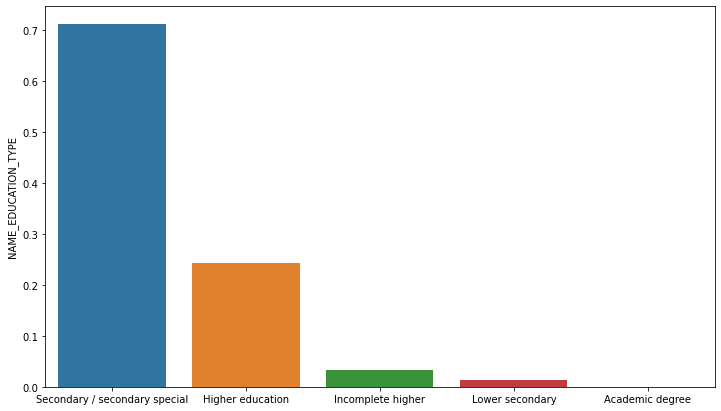

In [334]:
plt.figure(figsize=(12,7))
sns.barplot(x= df_1.NAME_EDUCATION_TYPE.value_counts().index, y=df_1.NAME_EDUCATION_TYPE.value_counts(normalize=True))
plt.show()

**More than 70% of the clients have done Secondary education and about 25% have done Higher Education**

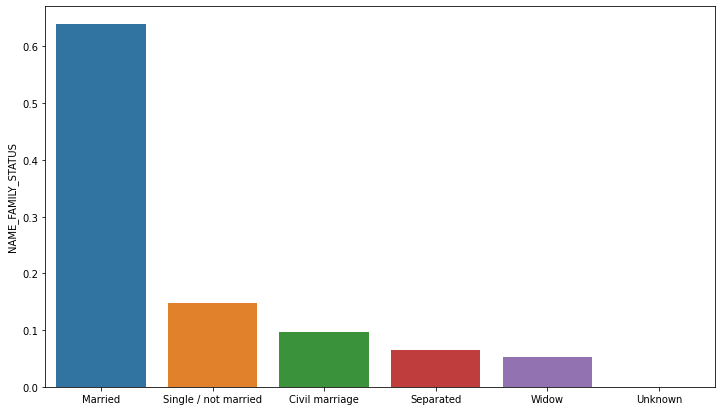

In [335]:
plt.figure(figsize=(12,7))
sns.barplot(x= df_1.NAME_FAMILY_STATUS.value_counts().index, y=df_1.NAME_FAMILY_STATUS.value_counts(normalize=True))
plt.show()

**About 65% of the clients are married, and 15% of the clients are single**

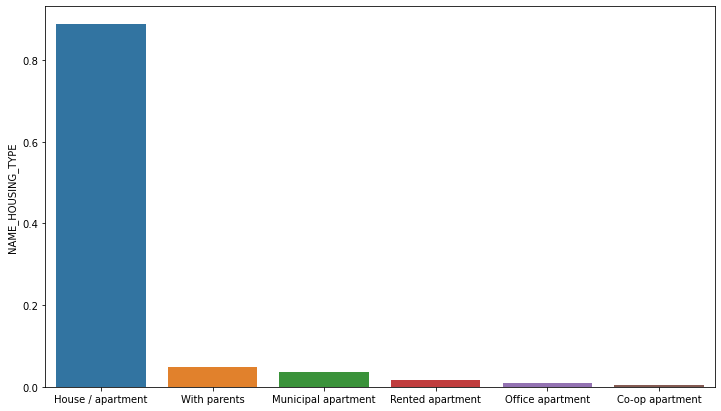

In [336]:
plt.figure(figsize=(12,7))
sns.barplot(x= df_1.NAME_HOUSING_TYPE.value_counts().index, y=df_1.NAME_HOUSING_TYPE.value_counts(normalize=True))
plt.show()

**About 90% of the clients are living in own House/Apartment**

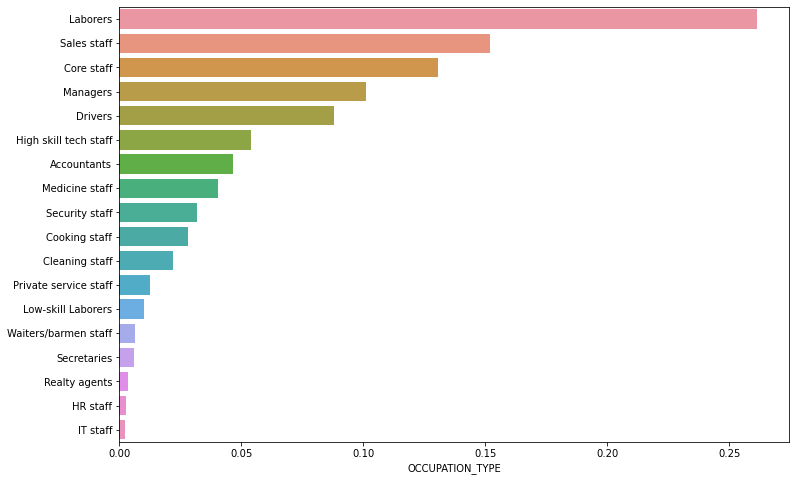

In [337]:
plt.figure(figsize=(12,8))
sns.barplot(y= df_1.OCCUPATION_TYPE.value_counts().index, x=df_1.OCCUPATION_TYPE.value_counts(normalize=True))
plt.show()

**There are clients distributed over many occupation types. And the maximum number of clients are Laborers which is 25% flollowed by Sales staff who are more than 15%**

In [338]:
mob_corr = df_1[['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL', 'TARGET']].corr()

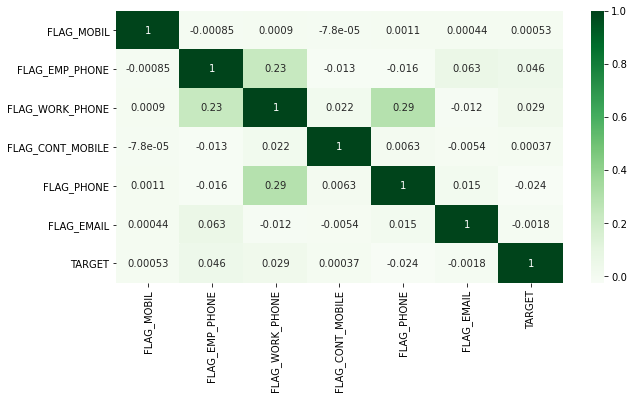

In [339]:
plt.figure(figsize=(10,5))
sns.heatmap(mob_corr, annot=True, cmap = 'Greens')
plt.show()

**None of the above attributes have a positively high or negatively low relation with the target variable. So they do not affect the target variable**

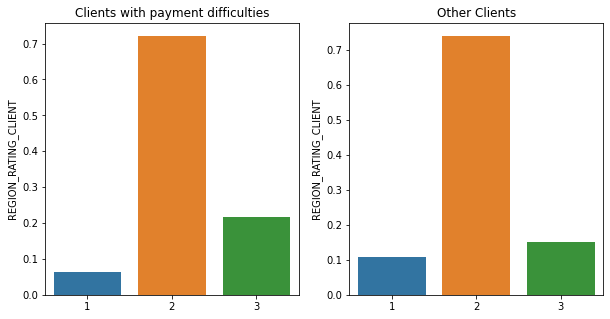

In [340]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.barplot(x= d1.REGION_RATING_CLIENT.value_counts().index, y=d1.REGION_RATING_CLIENT.value_counts(normalize=True))
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.barplot(x= d2.REGION_RATING_CLIENT.value_counts().index, y=d2.REGION_RATING_CLIENT.value_counts(normalize=True))
plt.show()

**From the above graphs we can observer that the ratio of defaulted clients in region with rating 3 is slightlty more than the ratio of  other clients in  the same region.**

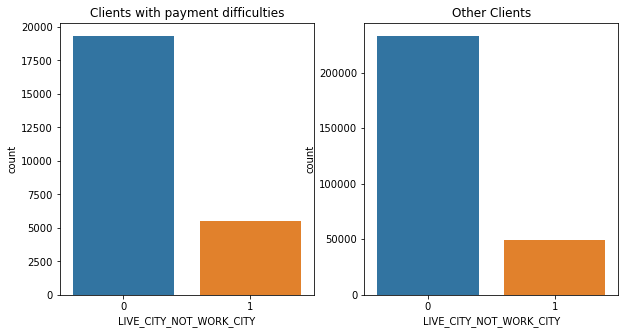

In [341]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(d1.LIVE_CITY_NOT_WORK_CITY)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(d2.LIVE_CITY_NOT_WORK_CITY)
plt.show()

In [342]:
flag_target = df_1.pivot_table(columns='TARGET', values=['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20'])

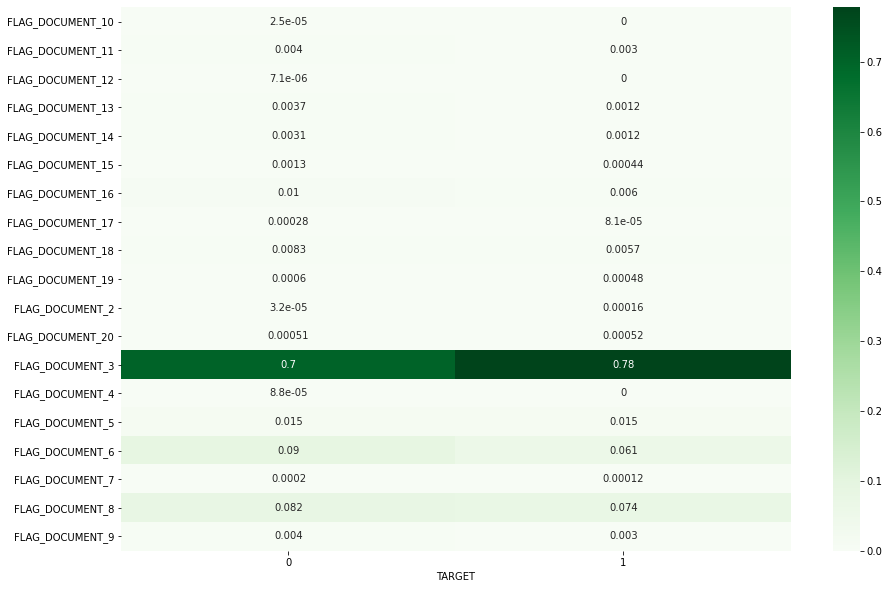

In [343]:
plt.figure(figsize=(15,10))
sns.heatmap(flag_target, annot=True, cmap='Greens')
plt.show()

In [344]:
# Dropping all the above columns

df_1.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20'],axis=1, inplace=True)

In [345]:
df_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0             202.5    406.5975      24.7005   
1               N             0             270.0   1293.5025      35.6985   
2               Y             0              67.5    135.0000       6.7500   
3               Y             0             135.0    312.6825      29.6865   
4               Y             0             121.5    513.0000      21.8655   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0            351.0   Unaccompanied          Working   
1           1129.5          Family    State servant   
2            135.0   Unaccompanied          Working   
3            297.0   Unaccompanied          Working   
4            513.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          26            637            -3648.0   
1                    0.003541          46           1188            -1186.0   
2                    0.010032          53            225            -4260.0   
3                    0.008019          53           3039            -9833.0   
4                    0.028663          55           3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0

**Submission of documents does not affect defaulting the payment**

In [346]:
# Replacing XNA with null values in Gender

df_1.CODE_GENDER = df_1.CODE_GENDER.replace('XNA',np.nan)
df_1.CODE_GENDER.value_counts()

F    202445
M    105055
Name: CODE_GENDER, dtype: int64

In [347]:
# Creating a pivot table for Contract Type vs Gender, with client as values

var = df_1.pivot_table(columns='NAME_CONTRACT_TYPE', index='CODE_GENDER', values='TARGET')
var.head()

NAME_CONTRACT_TYPE  Cash loans  Revolving loans
CODE_GENDER                                    
F                     0.071806         0.053084
M                     0.105776         0.058274

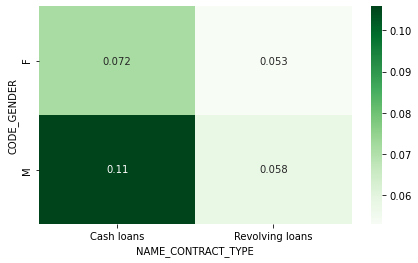

In [348]:
# Heatmap for the above pivot table

plt.figure(figsize=(7,4))
sns.heatmap(var, annot=True, cmap='Greens')
plt.show()

**Male clients who have taken cash loans are more tended to default the loan than the other clients**

In [349]:
# Creating a pivot table for Client Education Type vs Client Gender, with client as values

var = df_1.pivot_table(columns='CODE_GENDER', index='NAME_EDUCATION_TYPE', values='TARGET')
var.head()

CODE_GENDER                           F         M
NAME_EDUCATION_TYPE                              
Academic degree                0.030000  0.000000
Higher education               0.048482  0.063940
Incomplete higher              0.080216  0.092161
Lower secondary                0.092601  0.134884
Secondary / secondary special  0.076744  0.113623

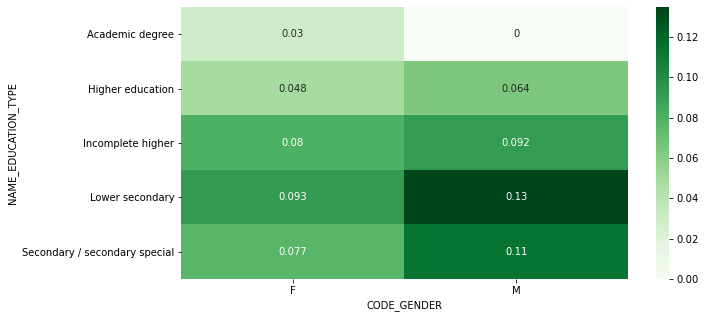

In [350]:
plt.figure(figsize=(10,5))
sns.heatmap(var, annot=True, cmap='Greens')
plt.show()

**We can see that the Male clients with Lower secondary and secondary education are more tended to default the loan than the other clients**

In [351]:
# Creating a pivot table for client Occupation type vs client Gender, with client as values

var = df_1.pivot_table(columns='CODE_GENDER', index='OCCUPATION_TYPE', values='TARGET')
var.head()

CODE_GENDER             F         M
OCCUPATION_TYPE                    
Accountants      0.047964  0.059859
Cleaning staff   0.095039  0.109145
Cooking staff    0.103064  0.117647
Core staff       0.059685  0.075674
Drivers          0.084324  0.114775

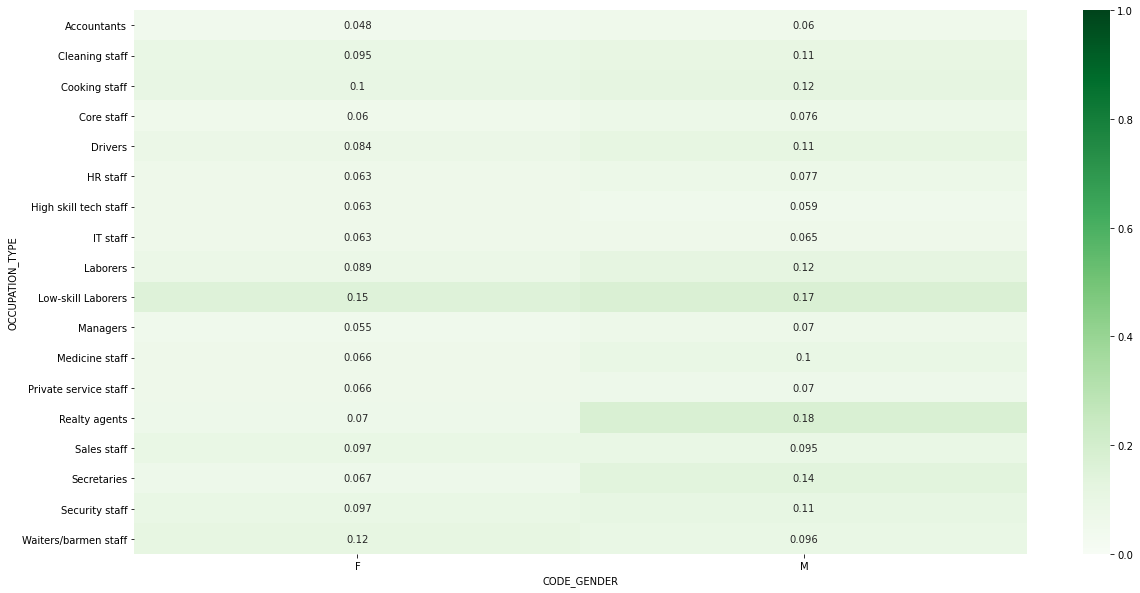

In [352]:
plt.figure(figsize=(20,10))
sns.heatmap(var, annot=True, cmap='Greens', vmax=1, vmin=0)
plt.show()

**From the above heatmap we can observe that the Low-skill Laborers(both male and female) and secretaries, Realty agents in male are more tended to default the loan than other clients**

### Region Rating vs Loan type

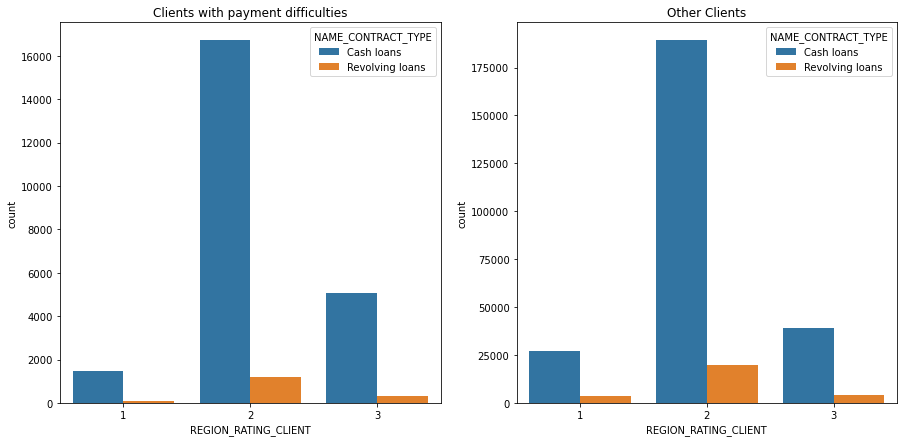

In [353]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.countplot(data=d1, x='REGION_RATING_CLIENT', hue='NAME_CONTRACT_TYPE')
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.countplot(data=d2, x='REGION_RATING_CLIENT', hue='NAME_CONTRACT_TYPE')
plt.show()

### Region rating vs Housing type

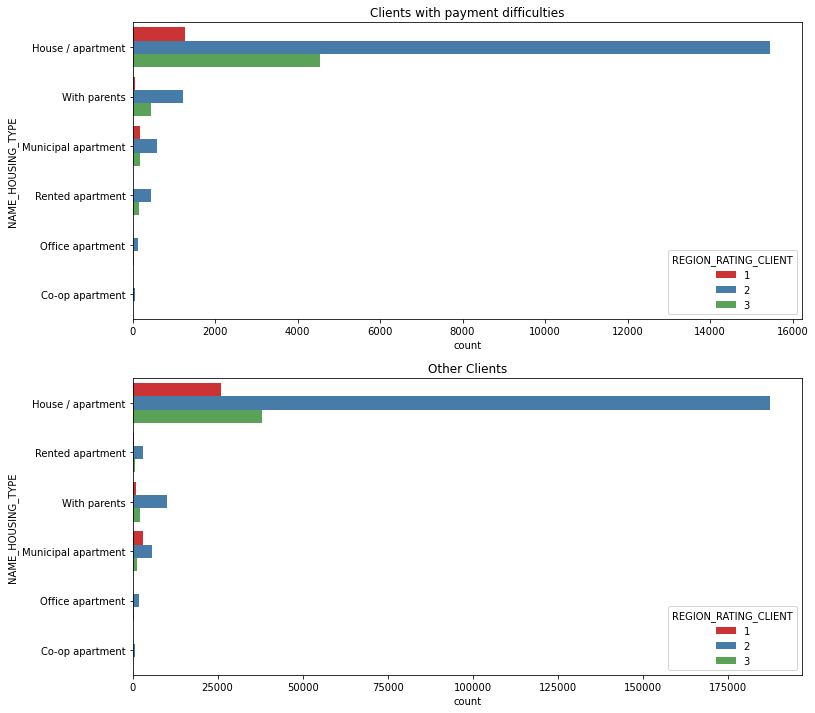

In [354]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
sns.countplot(data=d1, y='NAME_HOUSING_TYPE', hue='REGION_RATING_CLIENT', palette='Set1')
plt.subplot(2,1,2)
plt.title('Other Clients')
sns.countplot(data=d2, y='NAME_HOUSING_TYPE', hue='REGION_RATING_CLIENT', palette='Set1')
plt.show()

- **A very high prportion of the total number of clients are staying in own house**

In [355]:
df_1.REGION_RATING_CLIENT.value_counts(normalize=True)*100

2    73.812683
3    15.716748
1    10.470569
Name: REGION_RATING_CLIENT, dtype: float64

**73% of the clients are from reagion with rating 2 and nothing else to conclude from above graphs**

In [356]:
corr = df_1[['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','TARGET']].corr()
corr

REG_REGION_NOT_LIVE_REGION  \
REG_REGION_NOT_LIVE_REGION                     1.000000   
REG_REGION_NOT_WORK_REGION                     0.450767   
LIVE_REGION_NOT_WORK_REGION                    0.088282   
REG_CITY_NOT_LIVE_CITY                         0.339184   
REG_CITY_NOT_WORK_CITY                         0.143043   
LIVE_CITY_NOT_WORK_CITY                        0.009783   
TARGET                                         0.005585   

                             REG_REGION_NOT_WORK_REGION  \
REG_REGION_NOT_LIVE_REGION                     0.450767   
REG_REGION_NOT_WORK_REGION                     1.000000   
LIVE_REGION_NOT_WORK_REGION                    0.860647   
REG_CITY_NOT_LIVE_CITY                         0.151363   
REG_CITY_NOT_WORK_CITY                         0.239728   
LIVE_CITY_NOT_WORK_CITY                        0.197049   
TARGET                                         0.006952   

                             LIVE_REGION_NOT_WORK_REGION  \
REG_REGION_NOT_LIVE_REGION                      0.088282   
REG_REGION_NOT_WORK_REGION                      0.860647   
LIVE_REGION_NOT_WORK_REGION                     1.000000   
REG_CITY_NOT_LIVE_CITY                          0.021082   
REG_CITY_NOT_WORK_CITY                          0.185842   
LIVE_CITY_NOT_WORK_CITY                         0.236614   
TARGET                                          0.002825   

                             REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
REG_REGION_NOT_LIVE_REGION                 0.339184                0.143043   
REG_REGION_NOT_WORK_REGION                 0.151363                0.239728   
LIVE_REGION_NOT_WORK_REGION                0.021082                0.185842   
REG_CITY_NOT_LIVE_CITY                     1.000000                0.440402   
REG_CITY_NOT_WORK_CITY                     0.440402                1.000000   
LIVE_CITY_NOT_WORK_CITY                    0.028087                0.825569   
TARGET                                     0.044401                0.051002   

                             LIVE_CITY_NOT_WORK_CITY    TARGET  
REG_REGION_NOT_LIVE_REGION                  0.009783  0.005585  
REG_REGION_NOT_WORK_REGION                  0.197049  0.006952  
LIVE_REGION_NOT_WORK_REGION                 0.236614  0.002825  
REG_CITY_NOT_LIVE_CITY                      0.028087  0.044401  
REG_CITY_NOT_WORK_CITY                      0.825569  0.051002  
LIVE_CITY_NOT_WORK_CITY                     1.000000  0.032525  
TARGET                                      0.032525  1.000000

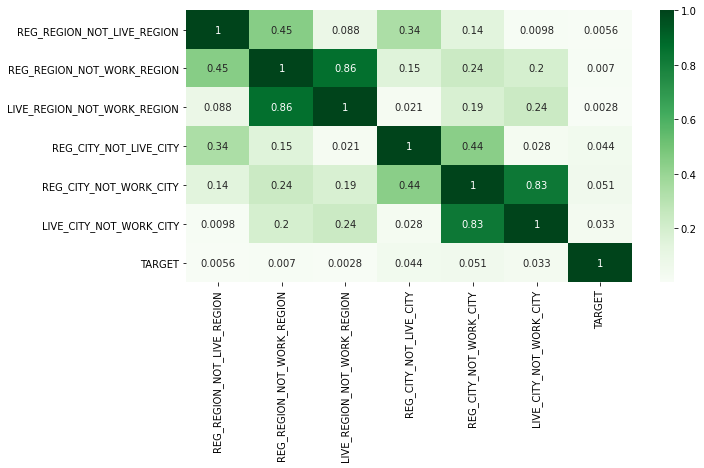

In [357]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

**None of the above columns have a correlation with the target**

### Client Income type Vs Loan Contract type

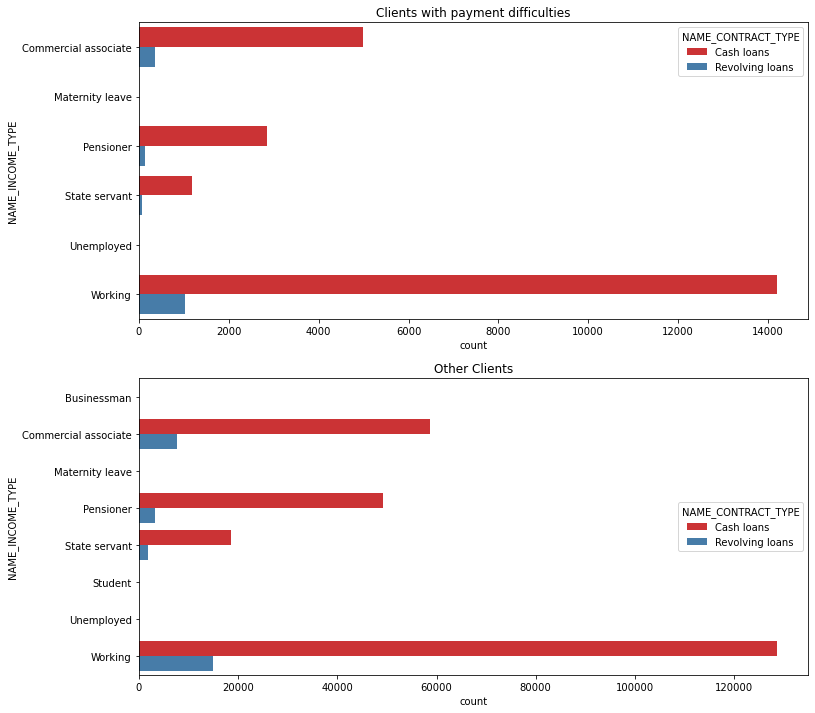

In [358]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
sns.countplot(data=d1, y='NAME_INCOME_TYPE', hue='NAME_CONTRACT_TYPE', palette='Set1', orient='h',order=d1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
sns.countplot(data=d2, y='NAME_INCOME_TYPE', hue='NAME_CONTRACT_TYPE', palette='Set1', orient='h', order=d2.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.show()

**Most of the clients are Working and have taken cash loans, followed by commercial associates. And we can also see that there are very few clients who are businessmen and they have never defaulted the loan amount**

### Client Housing type vs Family Status

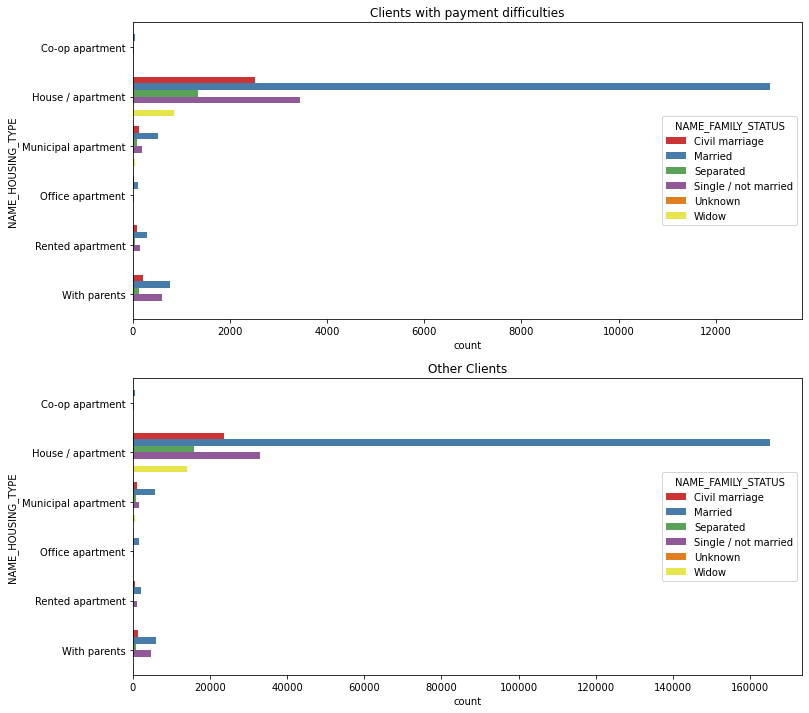

In [359]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
sns.countplot(data=d1, y='NAME_HOUSING_TYPE', hue='NAME_FAMILY_STATUS', palette='Set1',hue_order=d2.NAME_FAMILY_STATUS.value_counts().sort_index().index, order=d2.NAME_HOUSING_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
sns.countplot(data=d2, y='NAME_HOUSING_TYPE', hue='NAME_FAMILY_STATUS', palette='Set1', hue_order=d2.NAME_FAMILY_STATUS.value_counts().sort_index().index, order=d2.NAME_HOUSING_TYPE.value_counts().sort_index().index)
plt.show()

**Most of the clients are married and live in own House/Apartment, followed by clients who are single**

In [360]:
d2.CODE_GENDER = d2.CODE_GENDER.replace('XNA',np.nan)

### Gender Vs Credit Amount

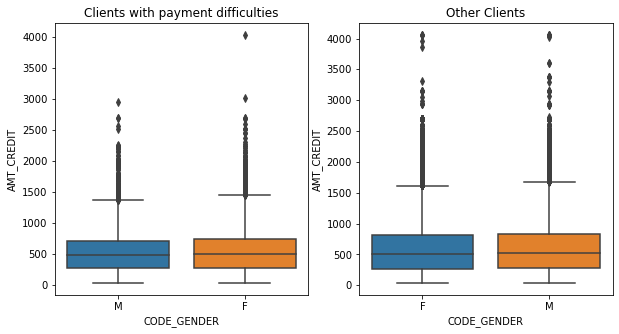

In [361]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=d2)
plt.show()

**All the quantlies look similar in the above graph. So nothing to conclude here.**

### Gender Vs Client Income

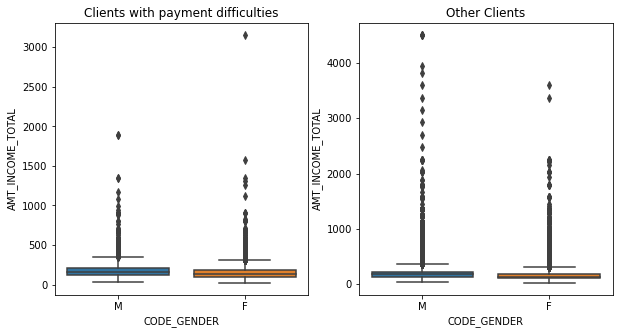

In [362]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', data=d2, order=['M','F'])
plt.show()

### Age

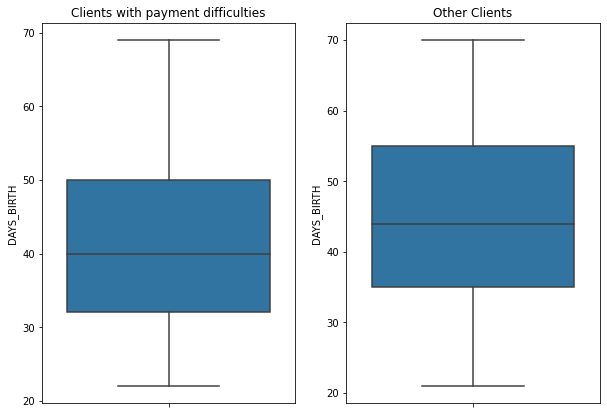

In [363]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(y = d1.DAYS_BIRTH)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(y = d2.DAYS_BIRTH)
plt.show()

**25%,median and the 75% of the other clients is higher than the clients who have defaulted, which means more younger clients are defaulting the payment than the older clients**

### Gender vs Age

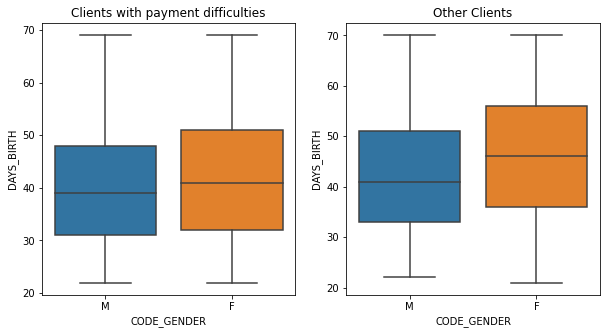

In [364]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(x='CODE_GENDER', y='DAYS_BIRTH', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(x='CODE_GENDER', y='DAYS_BIRTH', data=d2, order=['M','F'])
plt.show()

### Gender vs Score

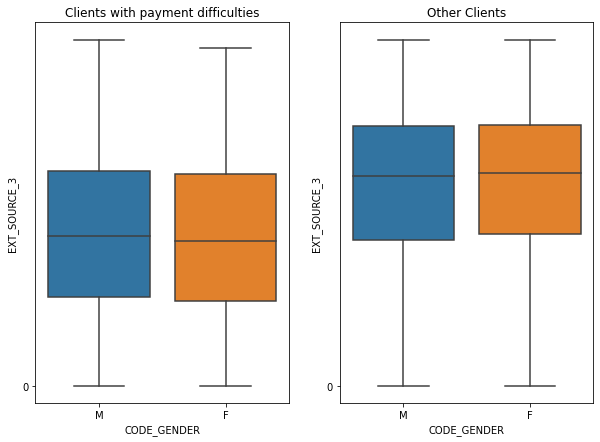

In [365]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(x='CODE_GENDER', y='EXT_SOURCE_3', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(x='CODE_GENDER', y='EXT_SOURCE_3', data=d2, order=['M','F'])
plt.show()

**In the above graph we can only observe that the score of clients who have payment difficulties is lesser than the other clients**

**In all the above graphs there is no difference in the gender when it comes defaulting the loans**

### Education Type Vs Loan Credit

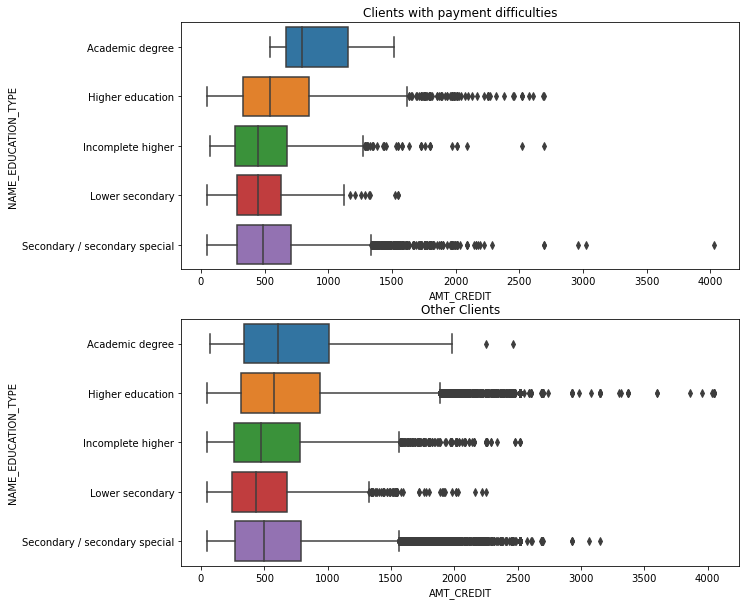

In [366]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_EDUCATION_TYPE', x='AMT_CREDIT', data=d1, order = d1.NAME_EDUCATION_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_EDUCATION_TYPE', x='AMT_CREDIT', data=d2, order = d2.NAME_EDUCATION_TYPE.value_counts().sort_index().index)
plt.show()

**We can see that the clients with Academic degree who had payment difficulties have a higher average of Loan credit amount than the other clients who had payment difficulties. It is recommended to keep a check on the loan credit amount for the clients with Academic degree**

### Income type vs Loan credit

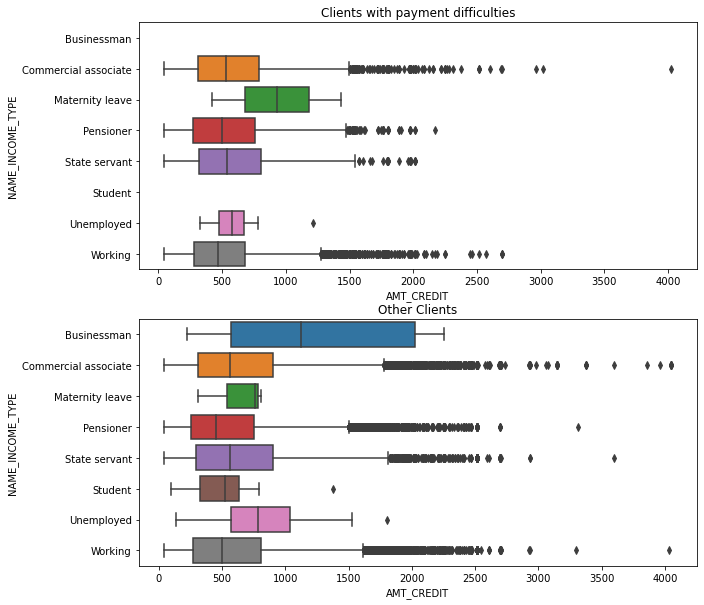

In [367]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='AMT_CREDIT', data=d1, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='AMT_CREDIT', data=d2, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.show()

- **We ca observe that the clients who are in `maternity leave` and have high amount of loan credit had payment difficulties.**
- **Loan Credit amount of `Businessmen` is very high than others and they have never defaulted the payment.**

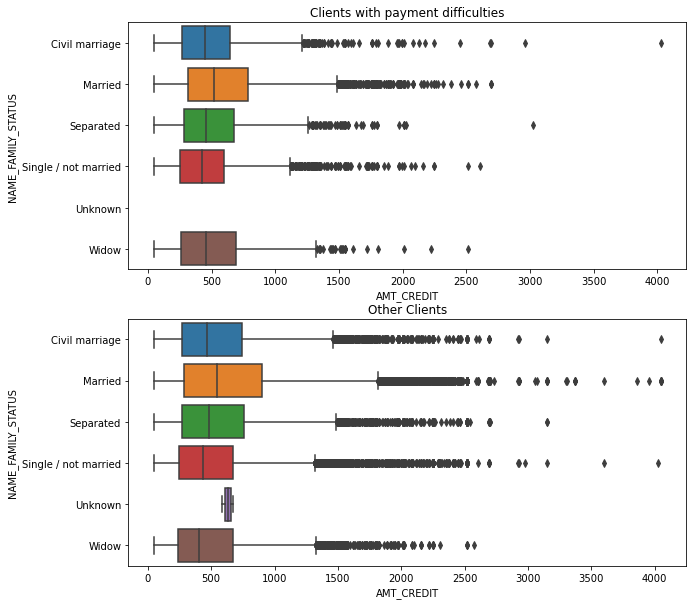

In [368]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_FAMILY_STATUS', x='AMT_CREDIT', data=d1, order = df_1.NAME_FAMILY_STATUS.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_FAMILY_STATUS', x='AMT_CREDIT', data=d2, order = df_1.NAME_FAMILY_STATUS.value_counts().sort_index().index)
plt.show()

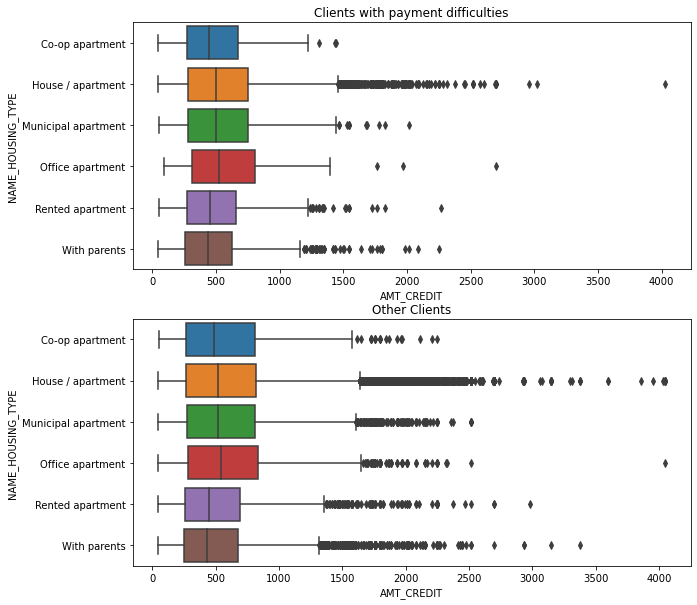

In [369]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_HOUSING_TYPE', x='AMT_CREDIT', data=d1, order = df_1.NAME_HOUSING_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_HOUSING_TYPE', x='AMT_CREDIT', data=d2, order = df_1.NAME_HOUSING_TYPE.value_counts().sort_index().index)
plt.show()

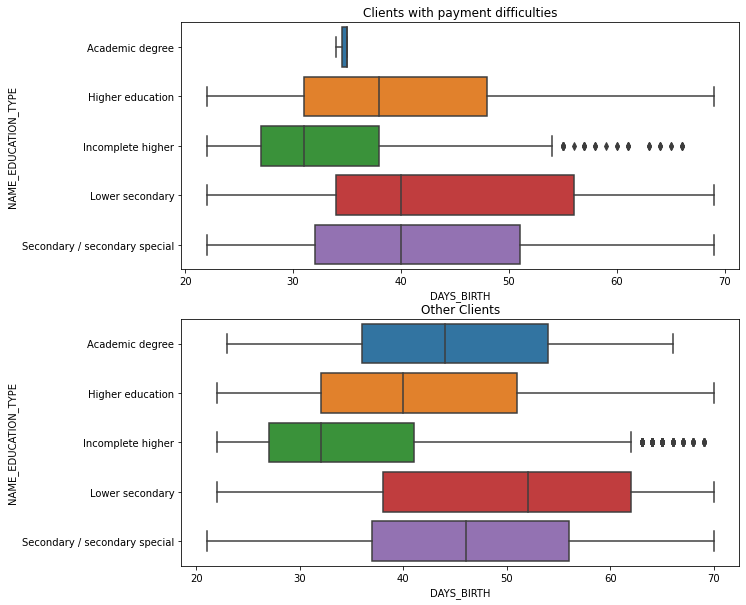

In [370]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_EDUCATION_TYPE', x='DAYS_BIRTH', data=d1, order = d1.NAME_EDUCATION_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_EDUCATION_TYPE', x='DAYS_BIRTH', data=d2, order = d2.NAME_EDUCATION_TYPE.value_counts().sort_index().index)
plt.show()

- **Clients with Lower secondary education seems to have higher mean age than the clients with Secondary education who have higher mean age than the other clients.**
- **Clients with academic degree and who had payment difficulties are very less and withing age 30 to 37**

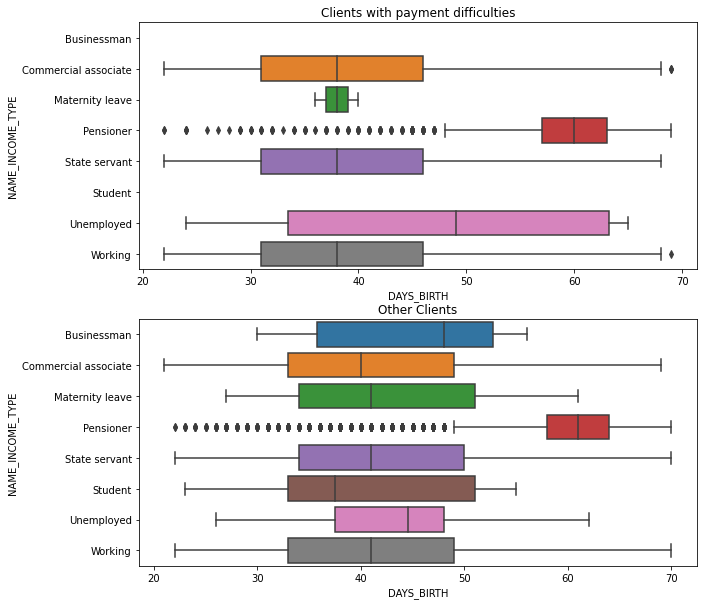

In [371]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='DAYS_BIRTH', data=d1, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='DAYS_BIRTH', data=d2, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.show()

- **Number of unemployed clients who had payment difficulties is more than the number of unemployed clients who are paying on time regularly**
- **And only 23% of the unemployed clients who are paying correctly are older than 50yrs. While more than 50% of the unemployed clients who had payment difficulties are older than 50yrs.**

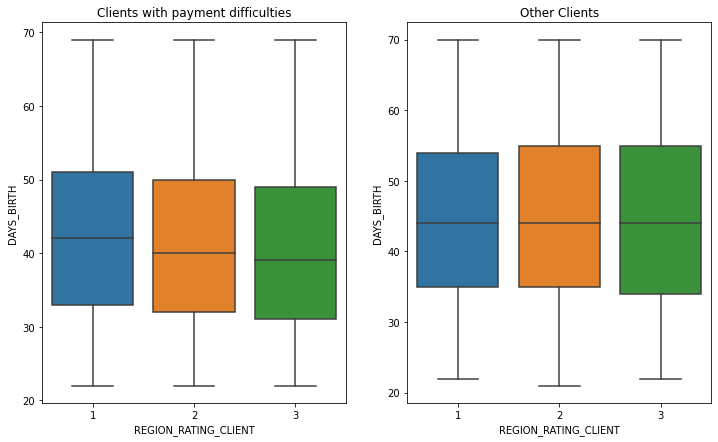

In [372]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(x='REGION_RATING_CLIENT', y='DAYS_BIRTH', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(x='REGION_RATING_CLIENT', y='DAYS_BIRTH', data=d2)
plt.show()

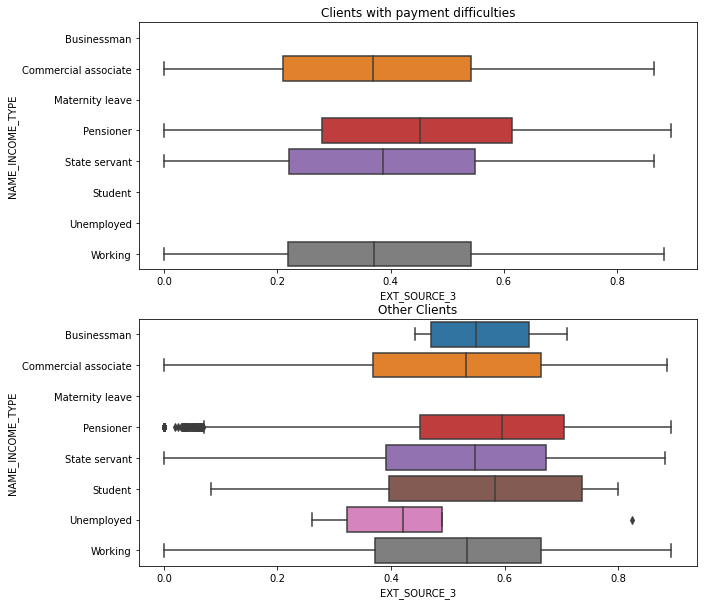

In [373]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.title('Clients with payment difficulties')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='EXT_SOURCE_3', data=d1, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.subplot(2,1,2)
plt.title('Other Clients')
plt.yticks(list(range(0,20)))
sns.boxplot(y='NAME_INCOME_TYPE', x='EXT_SOURCE_3', data=d2, order = df_1.NAME_INCOME_TYPE.value_counts().sort_index().index)
plt.show()

**Scores of the pensioners are comparitively higher than the clients of other income type**

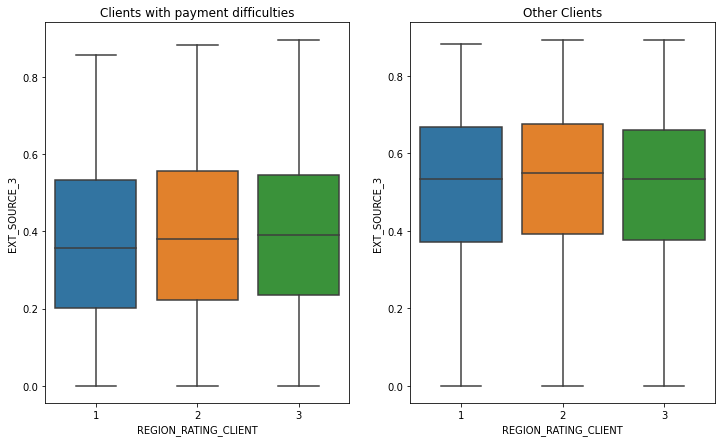

In [374]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.title('Clients with payment difficulties')
sns.boxplot(x='REGION_RATING_CLIENT', y='EXT_SOURCE_3', data=d1)
plt.subplot(1,2,2)
plt.title('Other Clients')
sns.boxplot(x='REGION_RATING_CLIENT', y='EXT_SOURCE_3', data=d2)
plt.show()

# Previous application

In [375]:
df_2 = pd.read_csv('previous_application.csv')

In [376]:
df_2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [557]:
x = (df_2.isnull().sum()/len(df_2) *100)

In [558]:
drop_prev = x[x>40].index # Drop these columns 

In [559]:
df_2.drop(drop_prev , axis =1 , inplace= True)

In [560]:
df_2.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         12.0           middle  POS mobile with interest  
1         36.0       low_action          Cash X-Sell: low  
2         12.0             high         Cash X-Sell: high  
3         12.0           middle       Cash X-Sell: middle  
4         24.0             high         Cash Street: high

In [561]:
x = (df_2.isnull().sum()/len(df_2) *100) #check for nulls now
impute_cols = x[x>0]

In [562]:
impute_cols

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

In [563]:
df_2[impute_cols.index]

AMT_ANNUITY  AMT_CREDIT  AMT_GOODS_PRICE  CNT_PAYMENT  \
0           1730.430     17145.0          17145.0         12.0   
1          25188.615    679671.0         607500.0         36.0   
2          15060.735    136444.5         112500.0         12.0   
3          47041.335    470790.0         450000.0         12.0   
4          31924.395    404055.0         337500.0         24.0   
...              ...         ...              ...          ...   
1670209    14704.290    311400.0         267295.5         30.0   
1670210     6622.020     64291.5          87750.0         12.0   
1670211    11520.855    102523.5         105237.0         10.0   
1670212    18821.520    191880.0         180000.0         12.0   
1670213    16431.300    360000.0         360000.0         48.0   

                 PRODUCT_COMBINATION  
0           POS mobile with interest  
1                   Cash X-Sell: low  
2                  Cash X-Sell: high  
3                Cash X-Sell: middle  
4                  Cash Street: high  
...                              ...  
1670209   POS industry with interest  
1670210   POS industry with interest  
1670211  POS household with interest  
1670212             Cash X-Sell: low  
1670213          Cash X-Sell: middle  

[1670214 rows x 5 columns]

In [564]:
df_2[df_2['AMT_ANNUITY'].isnull()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
22          1172842      302212         Cash loans          NaN   
...             ...         ...                ...          ...   
1670187     1971628      435554         Cash loans          NaN   
1670190     2381880      175920         Cash loans          NaN   
1670193     1120445      179433    Revolving loans          NaN   
1670196     1662123      398290     Consumer loans          NaN   
1670203     2844282      383898     Consumer loans          NaN   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
6                    0.0         0.0              NaN   
7                    0.0         0.0              NaN   
8                    0.0         0.0              NaN   
9                    0.0         0.0              NaN   
22                   0.0         0.0              NaN   
...                  ...         ...              ...   
1670187              0.0         0.0              NaN   
1670190              0.0         0.0              NaN   
1670193              0.0         0.0              NaN   
1670196          57910.5     57910.5          57910.5   
1670203          14791.5     14791.5          14791.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
22                         TUESDAY                        9   
...                            ...                      ...   
1670187                     MONDAY                       10   
1670190                     FRIDAY                       11   
1670193                     SUNDAY                       13   
1670196                   SATURDAY                        9   
1670203                    TUESDAY                       13   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
22                                Y                       1   
...                             ...                     ...   
1670187                           Y                       1   
1670190                           Y                       1   
1670193                           Y                       1   
1670196                           Y                       1   
1670203                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
6                          XNA             Canceled            -14   
7                          XNA             Canceled            -21   
8                          XNA             Canceled           -386   
9                          XNA             Canceled            -57   
22                         XNA              Refused           -239   
...                        ...                  ...            ...   
1670187                    XNA             Canceled           -134   
1670190                    XNA             Canceled           -243   
1670193                    XAP              Refused           -365   
1670196                    XAP         Unused offer           -289   
1670203                    XAP              Refused          -1848   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
6                          XNA                XAP         Repeater   
7                       

In [565]:
#lest check  NAME_CONTRACT_STATUS and AMT_ANNUITY if is is null because of cancelled state
df_2[df_2['AMT_ANNUITY'].isnull()]['NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: NAME_CONTRACT_STATUS, dtype: int64

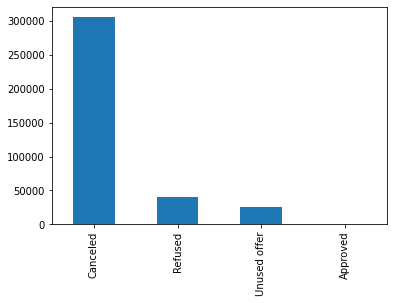

In [566]:
df_2[df_2['AMT_ANNUITY'].isnull()]['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.show()

indeed AMT_ANNUITY is largely due to cancelled state of application hence imputing it might not be right

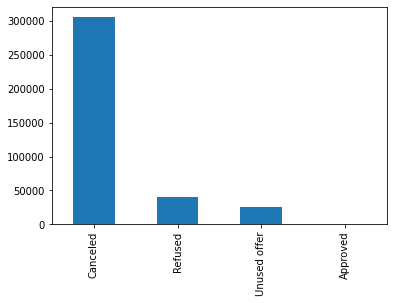

In [567]:
df_2[df_2['CNT_PAYMENT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.show()

the same applies for CNT_PAYMENT


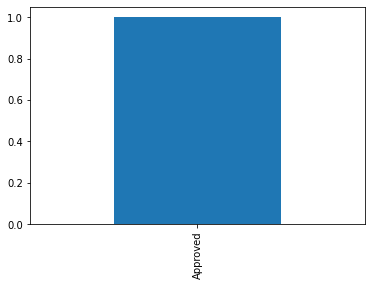

In [568]:
# AMT_CREDIT	AMT_GOODS_PRICE
df_2[df_2['AMT_CREDIT'].isnull()]['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.show()

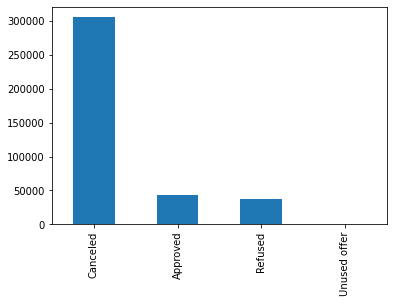

In [569]:
df_2[df_2['AMT_GOODS_PRICE'].isnull()]['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.show()

In [570]:
# lets impute AMT_CREDIT
df_2['AMT_CREDIT'].fillna(df_2['AMT_CREDIT'].mean() , inplace = True)

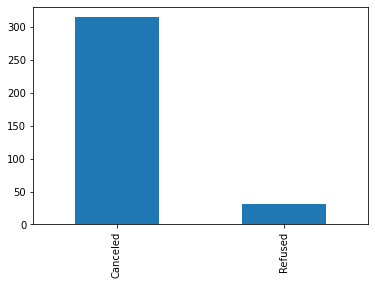

In [571]:
#PRODUCT_COMBINATION
df_2[df_2['PRODUCT_COMBINATION'].isnull()]['NAME_CONTRACT_STATUS'].value_counts().plot(kind = 'bar')
plt.show() # lets leave this also maybe here null has meaning 

## Univariate analysis

In [572]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670214 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

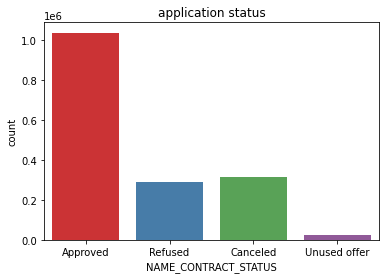

In [573]:
plt.title('application status')
sns.countplot(x='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

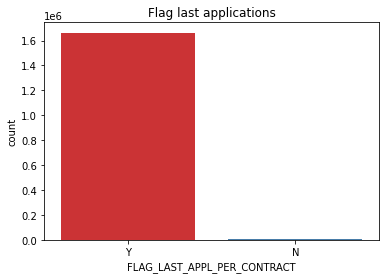

In [574]:
plt.title('Flag last applications')
sns.countplot(x='FLAG_LAST_APPL_PER_CONTRACT',data=df_2,palette='Set1')
plt.show()

very less application(duplicacy) issues due to client or clerk mistake

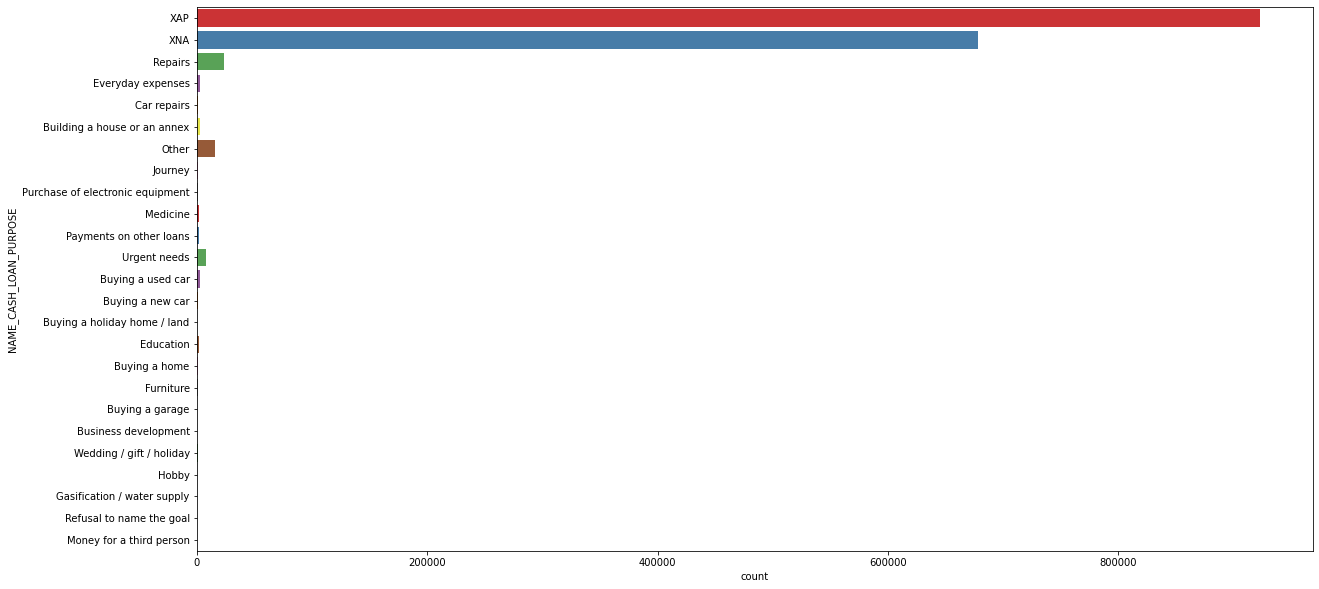

In [575]:
#NAME_CASH_LOAN_PURPOSE

ax = plt.figure(figsize=(20,10))
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',data=df_2,palette='Set1' ,orient ='h' )
plt.show()

most of the loans are under category XAP and XNA the rest are way to less honestly they seem to be null values as in the value of purpose was not caputerd so they added XNA and XAP lets see the same graph without XNA and XAP

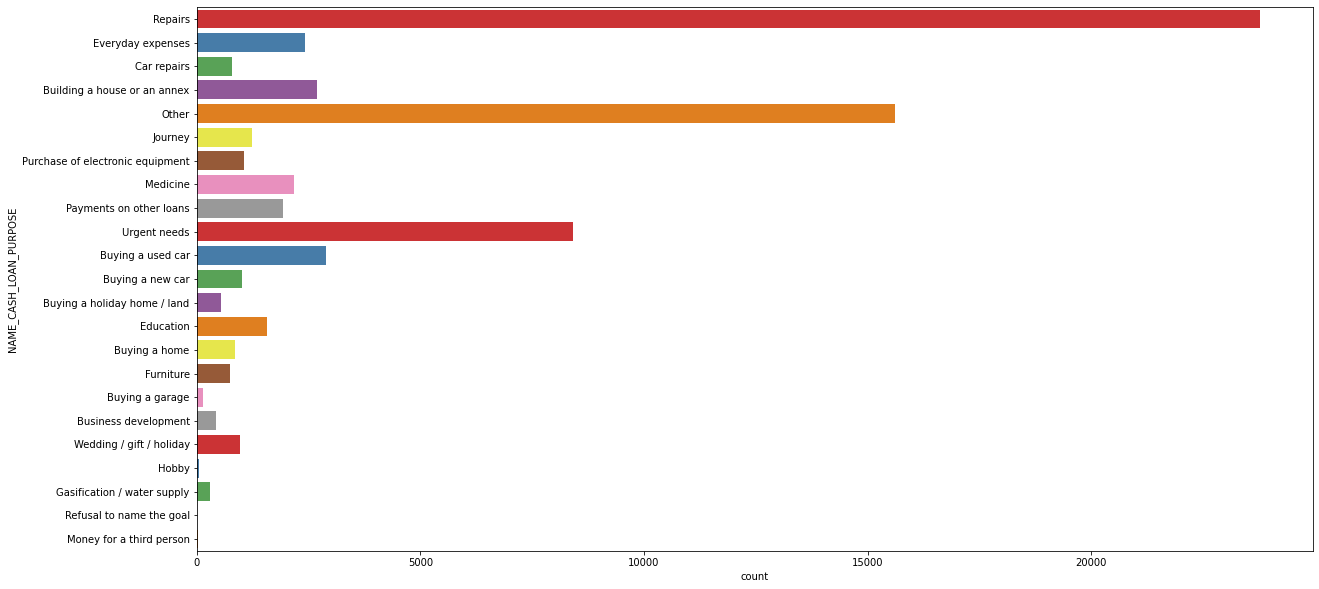

In [576]:
ax = plt.figure(figsize=(20,10))
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',data=df_2[(df_2['NAME_CASH_LOAN_PURPOSE']!= 'XAP') & (df_2['NAME_CASH_LOAN_PURPOSE']!= 'XNA') ],palette='Set1' ,orient ='h' )
plt.show()

now it tells a picture most of the loans seem to be building related.

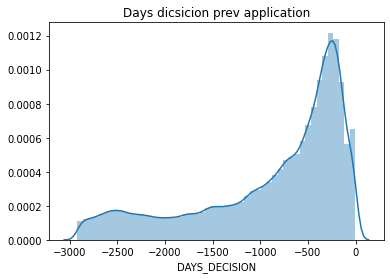

In [577]:
#DAYS_DECISION
plt.title('Days dicsicion prev application')
sns.distplot(df_2['DAYS_DECISION'])
plt.show()


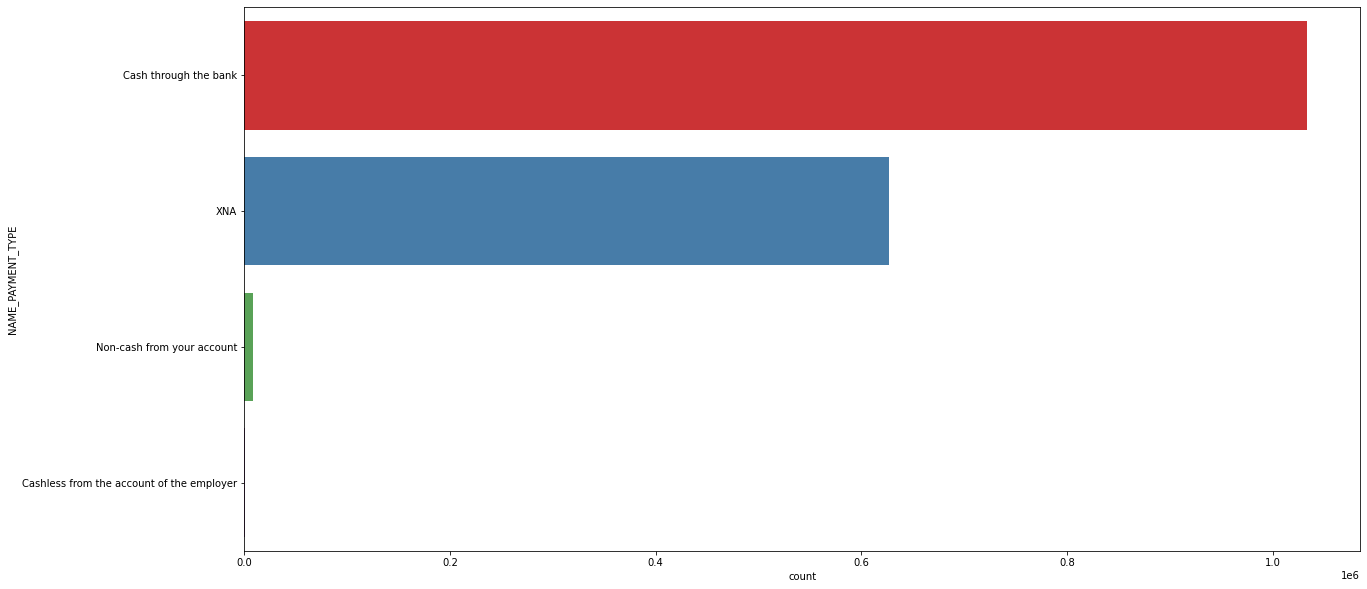

In [578]:
#NAME_PAYMENT_TYPE
ax = plt.figure(figsize=(20,10))
sns.countplot(y='NAME_PAYMENT_TYPE',data=df_2,palette='Set1' ,orient ='h' )
plt.show()

here also XNA seems to be `not-applicable` most used payment type is cash through bank

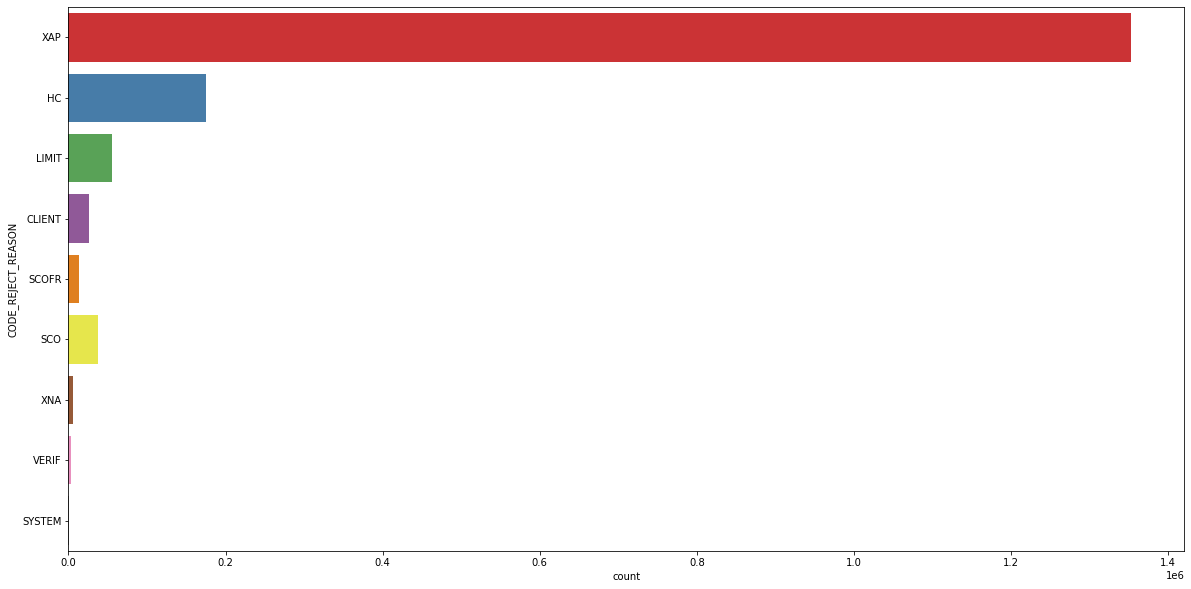

In [579]:
# CODE_REJECT_REASON
ax = plt.figure(figsize=(20,10))
sns.countplot(y='CODE_REJECT_REASON',data=df_2,palette='Set1' ,orient ='h' )
plt.show()

lets remove XAP

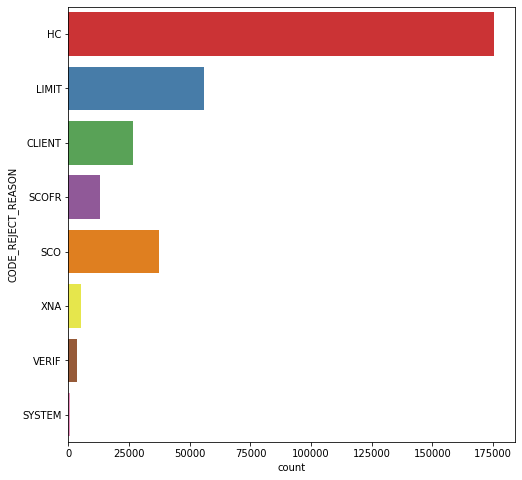

In [580]:
ax = plt.figure(figsize=(8,8))
sns.countplot(y='CODE_REJECT_REASON',data=df_2[df_2['CODE_REJECT_REASON'] != 'XAP'],palette='Set1' ,orient ='h' )
plt.show()

need domain knowledge here still HC seems to be leading

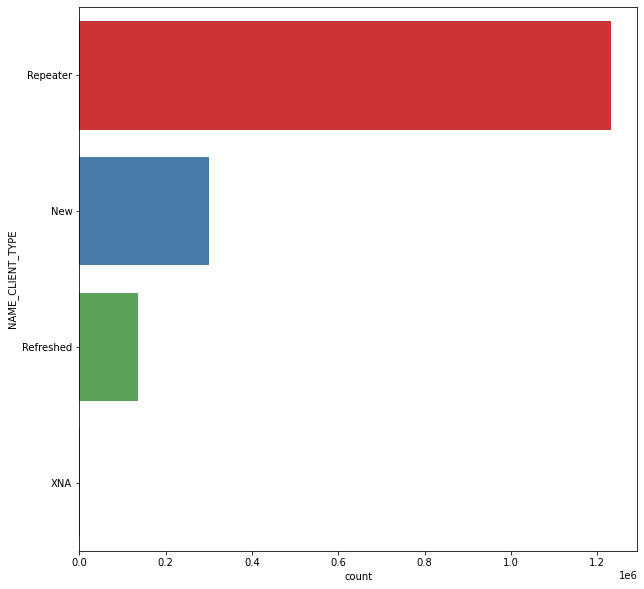

In [581]:
# NAME_CLIENT_TYPE
ax = plt.figure(figsize=(10,10))
sns.countplot(y='NAME_CLIENT_TYPE',data=df_2,palette='Set1' ,orient ='h' )
plt.show()

loyality does matter most of the customers are repeated customer followed by new customers

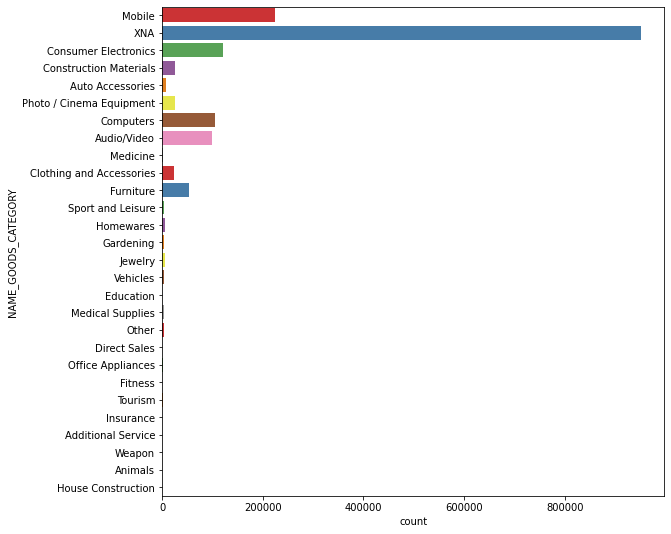

In [582]:
# NAME_GOODS_CATEGORY
ax = plt.figure(figsize=(9,9))
sns.countplot(y='NAME_GOODS_CATEGORY',data=df_2,palette='Set1' ,orient ='h' )
plt.show()

lets remove XNA and check the distribution


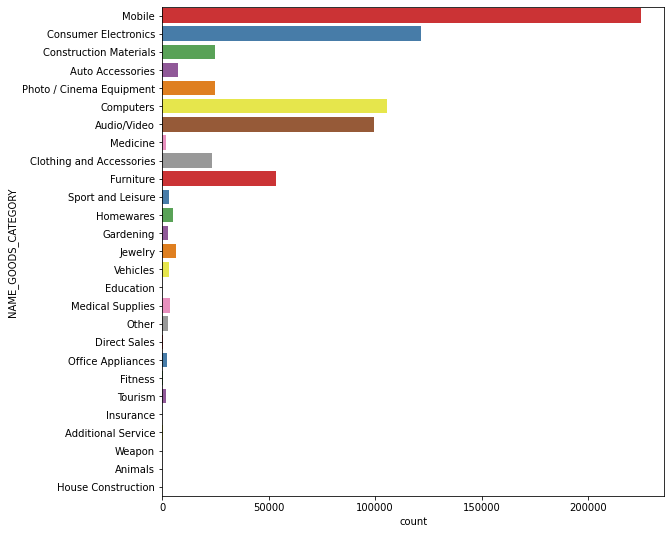

In [583]:
ax = plt.figure(figsize=(9,9))
sns.countplot(y='NAME_GOODS_CATEGORY',data=df_2[df_2['NAME_GOODS_CATEGORY'] != 'XNA'],palette='Set1' ,orient ='h' )
plt.show()

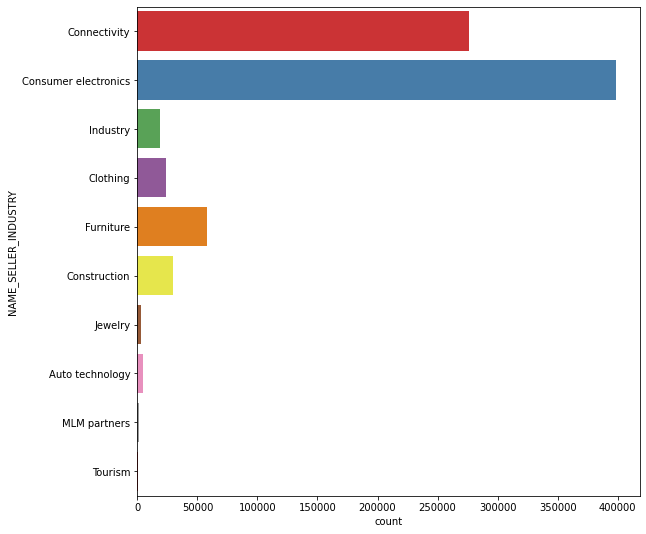

In [584]:
# NAME_SELLER_INDUSTRY
ax = plt.figure(figsize=(9,9))
sns.countplot(y='NAME_SELLER_INDUSTRY',data=df_2[df_2['NAME_SELLER_INDUSTRY'] != 'XNA'],palette='Set1' ,orient ='h' )
plt.show()

consumer electronics seems to be the top category

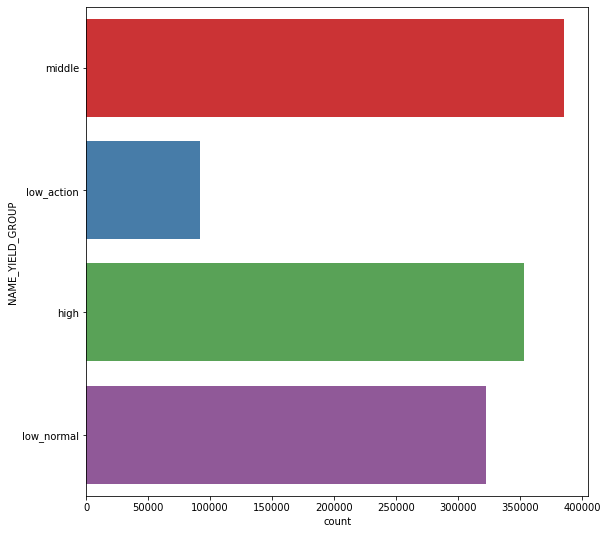

In [585]:
#NAME_YIELD_GROUP
ax = plt.figure(figsize=(9,9))
sns.countplot(y='NAME_YIELD_GROUP',data=df_2[df_2['NAME_YIELD_GROUP'] != 'XNA'],palette='Set1' ,orient ='h' )
plt.show()

In [586]:
df_2['diff_app'] =  df_2['AMT_APPLICATION'] - df_2['AMT_CREDIT']


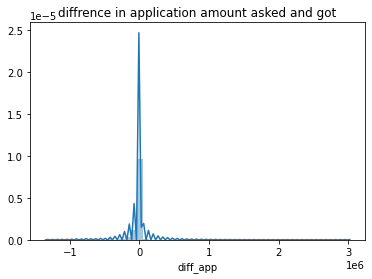

In [587]:
plt.title('diffrence in application amount asked and got')
sns.distplot(df_2['diff_app'])
plt.show()

In [588]:
df_2['diff_app'].value_counts() 

 0.00         654886
-450000.00      8570
-8910.00        8354
-5940.00        7549
-180000.00      7480
               ...  
 1360.44           1
-10138.86          1
-18768.60          1
-41319.00          1
 287280.00         1
Name: diff_app, Length: 59753, dtype: int64

mostly customer got what they asked for

# bi variate analysis

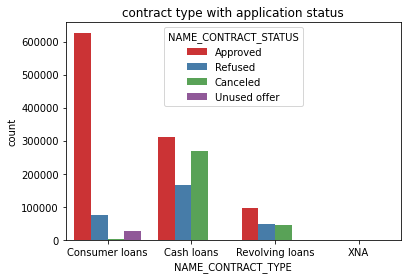

In [589]:
#lets check for diffrent variables in previous applications

plt.title('contract type with application status')
sns.countplot(x='NAME_CONTRACT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

Approved loans in general are more , specifically consumer loans are the most approves and it rarely gets canceled. 
<br> cash loans have highest canceled count

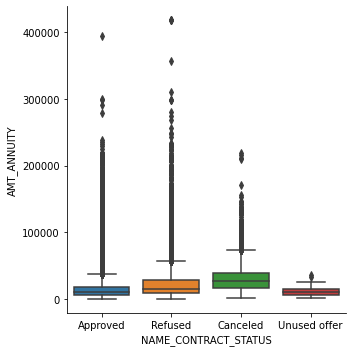

In [590]:

sns.catplot(x="NAME_CONTRACT_STATUS", y="AMT_ANNUITY",
            kind="box", dodge=False, data=df_2)
plt.show()

there seems to be outliers here let check it

In [591]:
df_2['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

the max is way off from the distribution as we can see from the box plot as well.

In [592]:
# lets check if the client get what he asked for

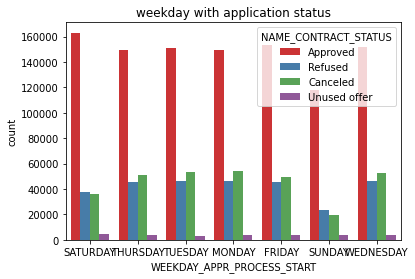

In [593]:
plt.title('weekday with application status')
sns.countplot(x='WEEKDAY_APPR_PROCESS_START',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

nothing to conclude here

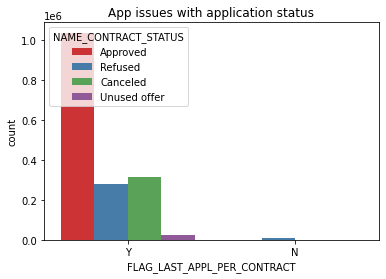

In [594]:
plt.title('App issues with application status')
sns.countplot(x='FLAG_LAST_APPL_PER_CONTRACT',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

application issues(duplicacy_flag) seem to be refused as expected

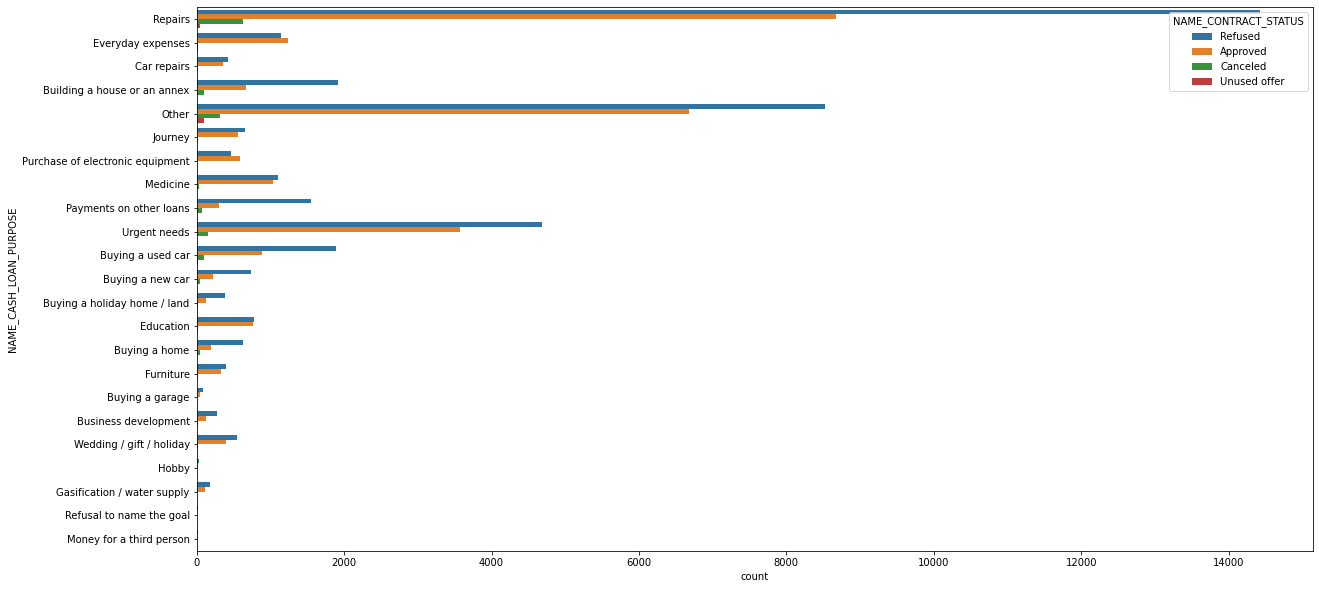

In [595]:
ax = plt.figure(figsize=(20,10))
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',
              data=df_2[(df_2['NAME_CASH_LOAN_PURPOSE']!= 'XAP') & (df_2['NAME_CASH_LOAN_PURPOSE']!= 'XNA') ],
               orient = 'v')
plt.show()

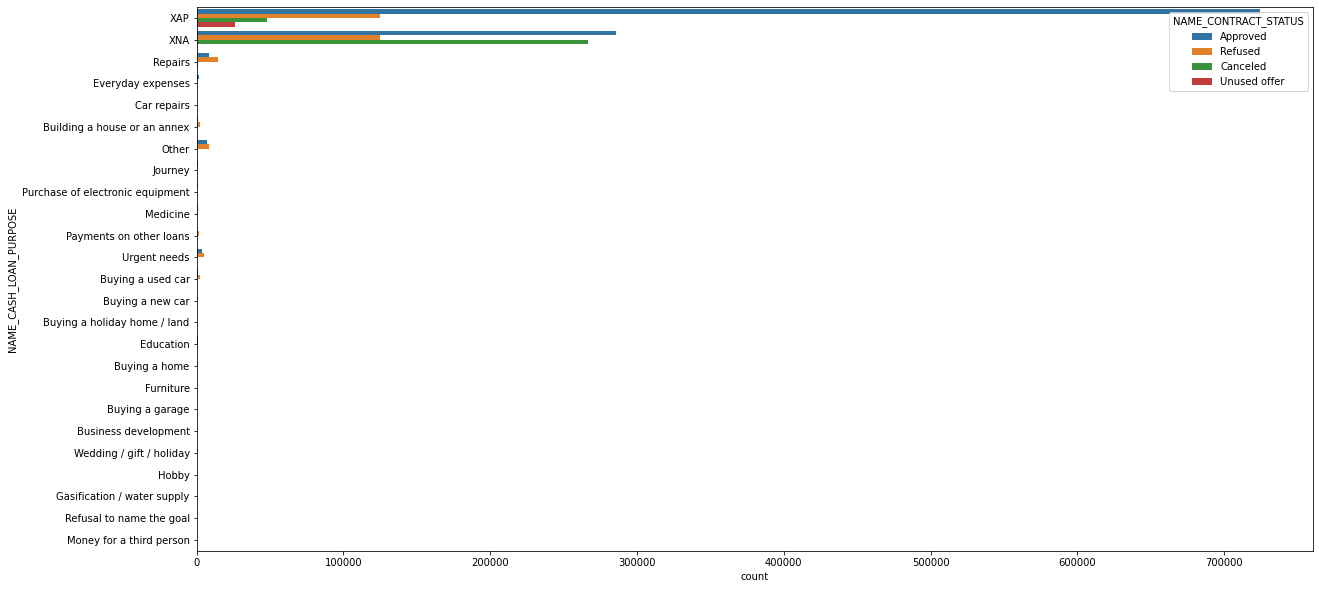

In [596]:
ax = plt.figure(figsize=(20,10))
sns.countplot(y='NAME_CASH_LOAN_PURPOSE',hue='NAME_CONTRACT_STATUS',
              data=df_2,
               orient = 'v')
plt.show()

most of the purposes were refused on the other hand most of the XNA and XPA are approved 

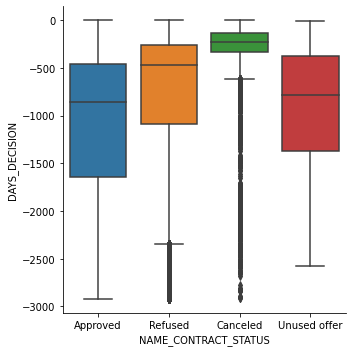

In [597]:
sns.catplot(x="NAME_CONTRACT_STATUS", y="DAYS_DECISION",
            kind="box", dodge=False, data=df_2)
plt.show()

Approved loans and unused loans seem to not have an outlier mostly Approved are done within -1500 days where as others seem to be alot earlier

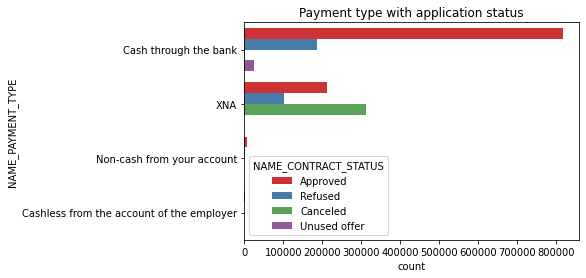

In [598]:
#NAME_PAYMENT_TYPE
plt.title('Payment type with application status')
sns.countplot(y='NAME_PAYMENT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

Cash through bank seem to be most approved

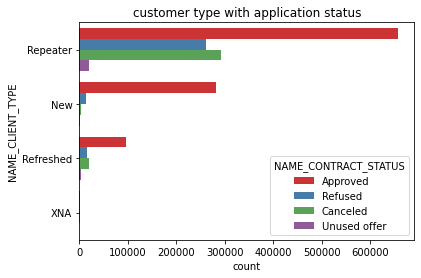

In [599]:
# NAME_CLIENT_TYPE
plt.title('customer type with application status')
sns.countplot(y='NAME_CLIENT_TYPE',hue='NAME_CONTRACT_STATUS',data=df_2,palette='Set1')
plt.show()

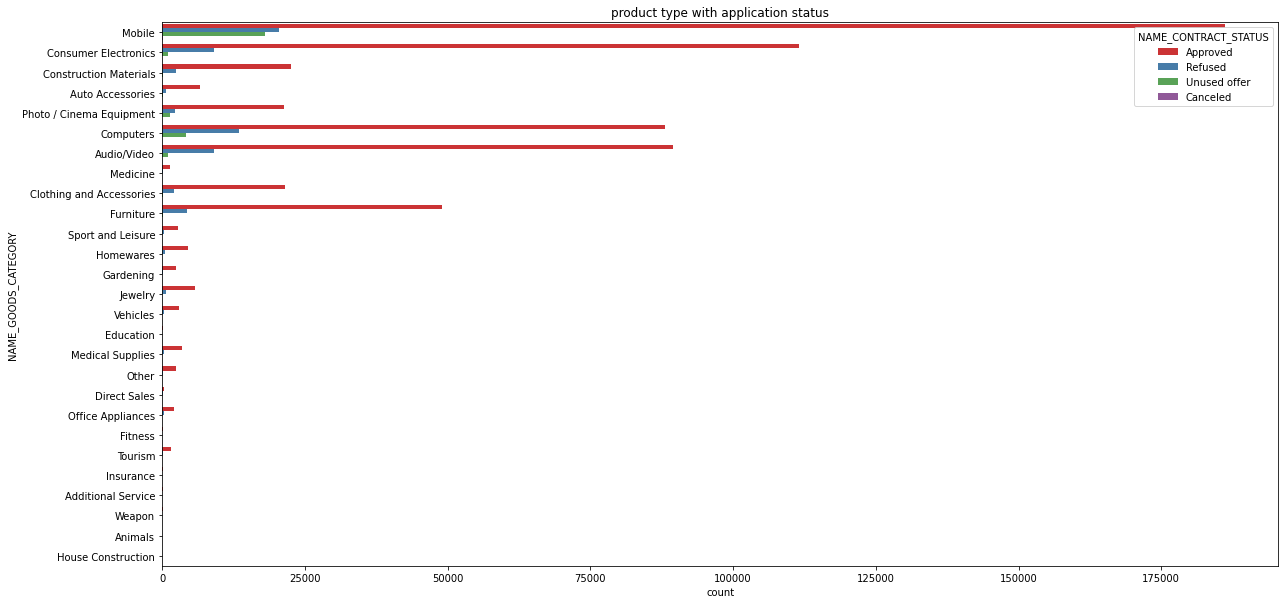

In [600]:
# NAME_GOODS_CATEGORY
ax = plt.figure(figsize=(20,10))
plt.title('product type with application status')
sns.countplot(y='NAME_GOODS_CATEGORY',hue='NAME_CONTRACT_STATUS',data=df_2[df_2['NAME_GOODS_CATEGORY'] != 'XNA'],palette='Set1')
plt.show()

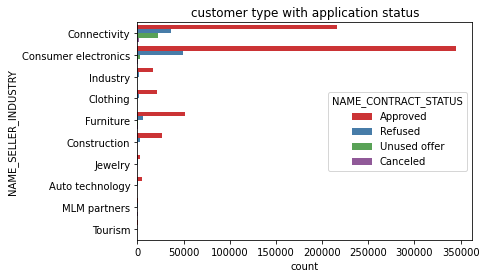

In [601]:
# NAME_SELLER_INDUSTR 
plt.title('customer type with application status')
sns.countplot(y='NAME_SELLER_INDUSTRY',hue='NAME_CONTRACT_STATUS',data=df_2[df_2['NAME_SELLER_INDUSTRY']!= 'XNA'],palette='Set1')
plt.show()

## lets check for correlations

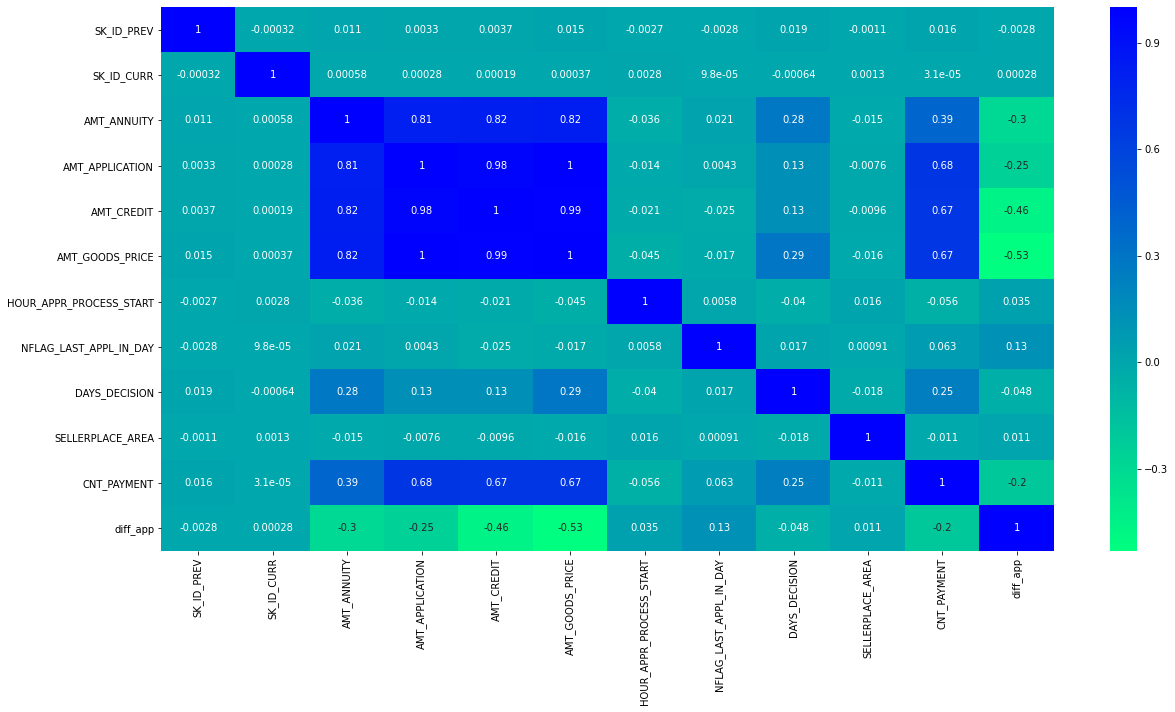

In [602]:
Corr = df_2.corr()
ax = plt.figure(figsize=(20,10))
sns.heatmap(Corr, xticklabels=Corr.columns, yticklabels=Corr.columns, annot=True , cmap='winter_r')

amount related_fields seem to be highly correlated

# lets merge the dataframes

In [603]:
df_f = df_1.merge(df_2, left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [604]:
df_f.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406.5975   
1               N             0          270000.0     1293.5025   
2               N             0          270000.0     1293.5025   
3               N             0          270000.0     1293.5025   
4               Y             0           67500.0      135.0000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24.7005              351.0   Unaccompanied          Working   
1        35.6985             1129.5          Family    State servant   
2        35.6985             1129.5          Family    State servant   
3        35.6985             1129.5          Family    State servant   
4         6.7500              135.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          26            637            -3648.0   
1                    0.003541          46           1188            -1186.0   
2                    0.003541          46           1188            -1186.0   
3                    0.003541          46           1188            -1186.0   
4                    0.010032          53            225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0          

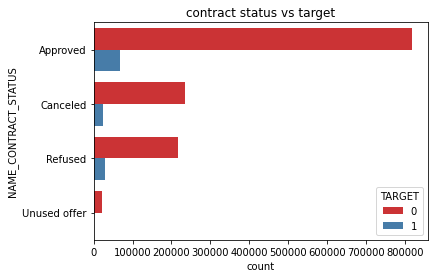

In [605]:
# lets see target and NAME_CONTRACT_STATUS
plt.title('contract status vs target')
sns.countplot(y='NAME_CONTRACT_STATUS',hue='TARGET',data=df_f,palette='Set1')
plt.show()

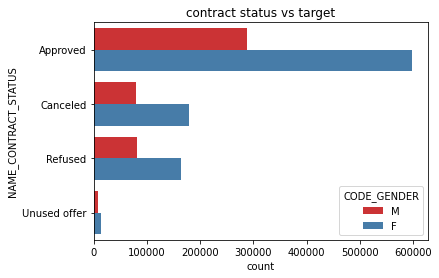

In [606]:
# lets check the approval rate by gender
plt.title('contract status vs target')
sns.countplot(y='NAME_CONTRACT_STATUS',hue='CODE_GENDER',data=df_f,palette='Set1')
plt.show()

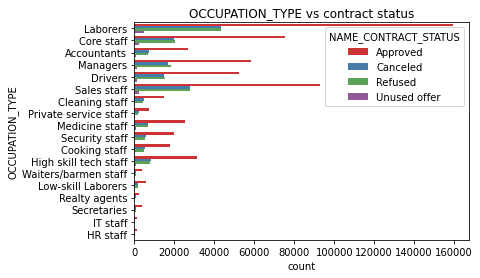

In [607]:
# let check the   OCCUPATION_TYPE
plt.title('OCCUPATION_TYPE vs contract status')
sns.countplot(y='OCCUPATION_TYPE',hue='NAME_CONTRACT_STATUS',data=df_f,palette='Set1')
plt.show()


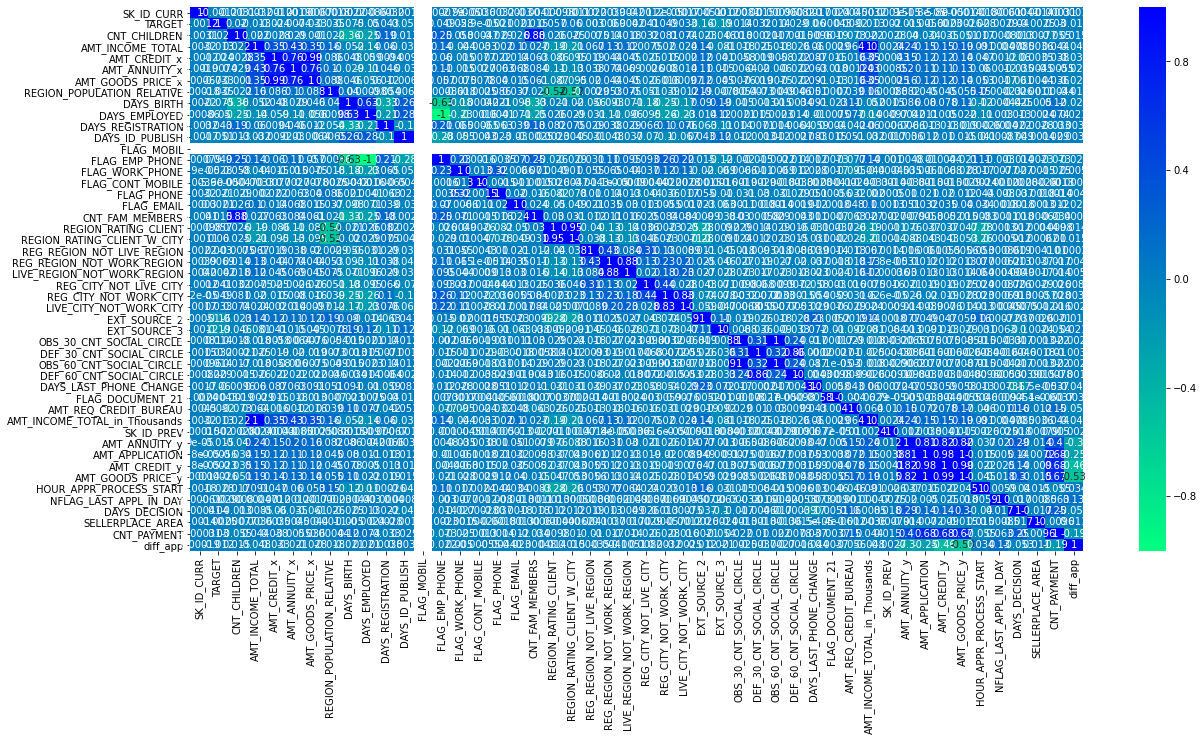

In [608]:
Corr = df_f.corr()
ax = plt.figure(figsize=(20,10))
sns.heatmap(Corr, xticklabels=Corr.columns, yticklabels=Corr.columns, annot=True , cmap='winter_r')

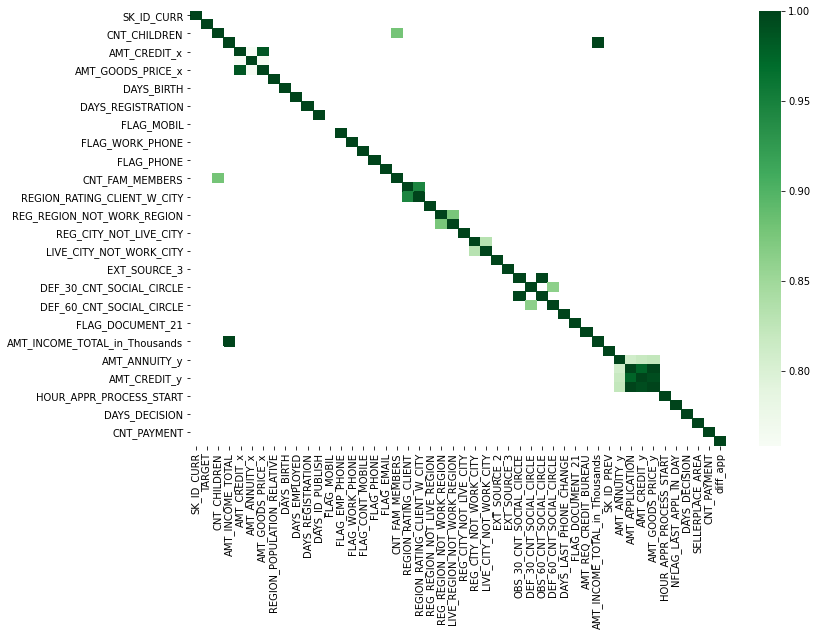

In [609]:
# lets check only top coorelations
corr = df_f.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

# lets check how previos data relales to current data

In [610]:
df_f[df_f['TARGET']==1].sort_values(by = 'SK_ID_CURR' )

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
161          100047       1           Cash loans           M            N   
162          100047       1           Cash loans           M            N   
163          100047       1           Cash loans           M            N   
164          100047       1           Cash loans           M            N   
...             ...     ...                  ...         ...          ...   
1413535      456225       1           Cash loans           M            N   
1413577      456233       1           Cash loans           F            N   
1413578      456233       1           Cash loans           F            N   
1413667      456254       1           Cash loans           F            N   
1413668      456254       1           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0                     Y             0          202500.0      406.5975   
161                   Y             0          202500.0     1193.5800   
162                   Y             0          202500.0     1193.5800   
163                   Y             0          202500.0     1193.5800   
164                   Y             0          202500.0     1193.5800   
...                 ...           ...               ...           ...   
1413535               Y             0          225000.0      297.0000   
1413577               Y             0          225000.0      521.2800   
1413578               Y             0          225000.0      521.2800   
1413667               Y             0          171000.0      370.1070   
1413668               Y             0          171000.0      370.1070   

         AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE  \
0              24.7005              351.0   Unaccompanied   
161            35.0280              855.0   Unaccompanied   
162            35.0280              855.0   Unaccompanied   
163            35.0280              855.0   Unaccompanied   
164            35.0280              855.0   Unaccompanied   
...                ...                ...             ...   
1413535        19.9755              297.0          Family   
1413577        23.0895              450.0   Unaccompanied   
1413578        23.0895              450.0   Unaccompanied   
1413667        20.2050              319.5   Unaccompanied   
1413668        20.2050              319.5   Unaccompanied   

             NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0                     Working  Secondary / secondary special   
161      Commercial associate  Secondary / secondary special   
162      Commercial associate  Secondary / secondary special   
163      Commercial associate  Secondary / secondary special   
164      Commercial associate  Secondary / secondary special   
...                       ...                            ...   
1413535               Working  Secondary / secondary special   
1413577  Commercial associate  Secondary / secondary special   
1413578  Commercial associate  Secondary / secondary special   
1413667  Commercial associate  Secondary / secondary special   
1413668  Commercial associate  Secondary / secondary special   

           NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0        Single / not married  House / apartment                    0.018801   
161                   Married  House / apartment                    0.025164   
162                   Married  House / apartment                    0.025164   
163                   Married  House / apartment                    0.025164   
164                   Married  House / apartment                    0.025164   
...                       ...                ...                         ...   
1413535               Married  House / apartment                    0.008575   
1413577        Civil marriage  House / apartment                 

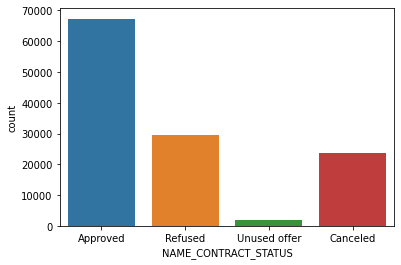

In [611]:
sns.countplot(x ='NAME_CONTRACT_STATUS' ,data = df_f[df_f['TARGET']==1])
plt.show()

lets compare if we remove the applications which were refused in the past.

In [612]:
df_f[df_f['NAME_CONTRACT_STATUS'] == 'Refused']['TARGET'].value_counts()

0    215947
1     29438
Name: TARGET, dtype: int64

In [613]:
df_f.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406.5975   
1               N             0          270000.0     1293.5025   
2               N             0          270000.0     1293.5025   
3               N             0          270000.0     1293.5025   
4               Y             0           67500.0      135.0000   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24.7005              351.0   Unaccompanied          Working   
1        35.6985             1129.5          Family    State servant   
2        35.6985             1129.5          Family    State servant   
3        35.6985             1129.5          Family    State servant   
4         6.7500              135.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801          26            637            -3648.0   
1                    0.003541          46           1188            -1186.0   
2                    0.003541          46           1188            -1186.0   
3                    0.003541          46           1188            -1186.0   
4                    0.010032          53            225            -4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0          

In [614]:
# what if we refused the loan because it was canceled or refused in the past.
def amt(x):
    if(x[1] in ('Refused' , 'Canceled')):
        return(x[0]/1000)
    else:
        return 0

df_f['is_refused'] = df_f['NAME_CONTRACT_STATUS'].apply(lambda x: 1 if(x in ('Refused' , 'Canceled')) else 0)
df_f['is_refused_amount'] = df_f[['AMT_ANNUITY_y' , 'NAME_CONTRACT_STATUS']].apply(amt ,  axis=1)
df_f['issued_amount'] = df_f['AMT_ANNUITY_x']

In [615]:
df_refused = df_f[['SK_ID_CURR','TARGET' ,'is_refused', 'is_refused_amount', 'AMT_ANNUITY_x' ]].groupby(by = 'SK_ID_CURR' ).max()

In [616]:
df_refused

TARGET  is_refused  is_refused_amount  AMT_ANNUITY_x
SK_ID_CURR                                                      
100002           1           0           0.000000        24.7005
100003           0           0           0.000000        35.6985
100004           0           0           0.000000         6.7500
100006           0           1          32.696100        29.6865
100007           0           0           0.000000        21.8655
...            ...         ...                ...            ...
456251           0           0           0.000000        27.5580
456252           0           0           0.000000        12.0015
456253           0           0           0.000000        29.9790
456254           1           0           0.000000        20.2050
456255           0           1          30.737655        49.1175

[291052 rows x 4 columns]

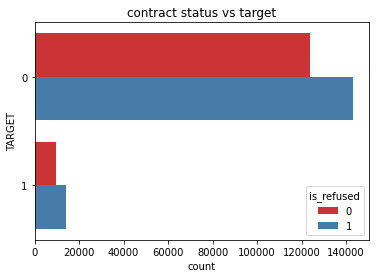

In [617]:
plt.title('contract status vs target')
sns.countplot(y='TARGET',hue='is_refused',data=df_refused,palette='Set1')
plt.show()

if we naively used only the refused and canceled states in past we could have lost a lot of buisness . though we could have mitigated the risk abit but the buisness lost is way too much.

In [618]:
#lets check the amount factor for refused and actual loan amounts
refused_compare = df_refused[df_refused['is_refused_amount']>0]


In [619]:
refused_compare.head()

TARGET  is_refused  is_refused_amount  AMT_ANNUITY_x
SK_ID_CURR                                                      
100006           0           1          32.696100        29.6865
100027           0           1          22.556475        23.8500
100030           0           1           6.176925        11.0745
100035           0           1          33.238800        24.5925
100036           0           1          13.290300        25.0335

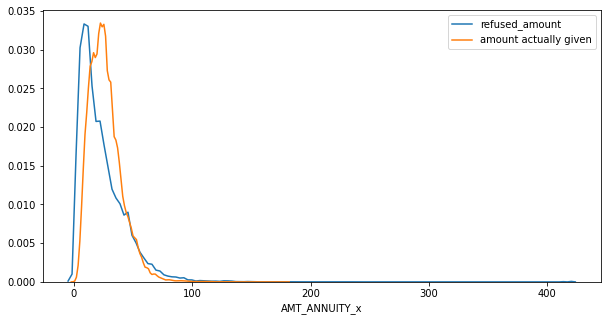

In [620]:
plt.figure(figsize=(10,5))
sns.distplot(refused_compare .is_refused_amount, hist=False,label= 'refused_amount')
sns.distplot(refused_compare.AMT_ANNUITY_x, hist=False, label= 'amount actually given')
plt.show()
# the scales seems to be way off hence not a good graph representation

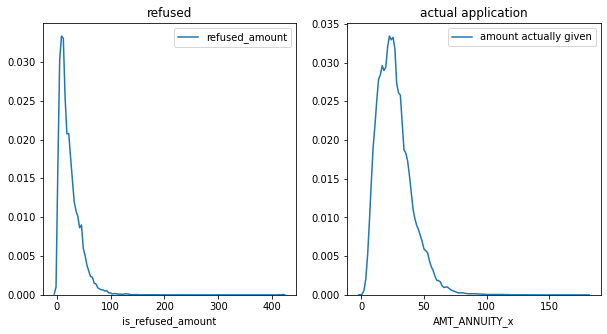

In [621]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('refused')
sns.distplot(refused_compare.is_refused_amount, hist=False,label= 'refused_amount')
plt.subplot(1,2,2)
plt.title('actual application')
sns.distplot(refused_compare.AMT_ANNUITY_x, hist=False, label= 'amount actually given')

It seems that the amount does play a role refused and actual applications are indeed way off. this means that the customer must have asked for way more and hence got rejected

In [622]:
refused_compare

TARGET  is_refused  is_refused_amount  AMT_ANNUITY_x
SK_ID_CURR                                                      
100006           0           1          32.696100        29.6865
100027           0           1          22.556475        23.8500
100030           0           1           6.176925        11.0745
100035           0           1          33.238800        24.5925
100036           0           1          13.290300        25.0335
...            ...         ...                ...            ...
456237           0           1          11.250000        37.6785
456243           0           1          17.541675        12.6945
456244           0           1          17.232030        35.9820
456249           0           1          11.497500        22.0500
456255           0           1          30.737655        49.1175

[95870 rows x 4 columns]